<h1>Exploratory Data Analysis</h1>
<h2>Further Work</h2>

<h3>Mr Elliot Walker (2022)</h3>

<h2>Overview</h2>
<p>It is the purpose of this investigative project to extend upon prior research [5] conducted in the area of economic polemology, regarding the relationship between European gas prices and the defense budgets of both NATO and Russia from 2014 to 2022. The project extends upon this with research into the sentiment communicated by articles published in 2022 by The Daily Mail [2] which mention either Russia, Ukraine, or their respective leaders Vladimir Putin and Volodimir Zelensky. The sentiment analysis focuses on these keywords, and is utilized to yield discrete values of either positive, neutral, or negative sentiment. The tag of interest here is Russia - which may refer to either the Russian nation, the Russian people, "Russia" as a sociopolitical singularity, the Russian language, etc.</p>

<p>The two goals of this project are to analyze how anti-Russian sentiment has been propagated throughout the British media in 2022, and how the European gas prices correlate to this sentiment, with The Daily Mail as the sole subject for now. A disclaimer is necessary here: this project is strictly analytical and should not be used for political ammunition, and is neither an attack or promotion of The Daily Mail, its contents, or its authors and journalists.</p>

<p>The scope of this research was limited to 2022 due to time constraints, yet it is entirely possible to expand upon this timeframe to accommodate years from 2014 up to and including 2022 for improved representability of data.</p>

<p>In light of this research it was discovered that the European gas prices (as per the Dutch TTF benchmark) shared primarily weak negative correlation with the sentiments of the articles published by The Daily Mail, with neutral sentiment possessing the highest correlation to these gas prices. Articles containing negative sentiment corresponded positively and strongly with high frequencies of Russian-related terms, and Ukraine-related terms.</p>

<h2>What is "Anti-Russian" Sentiment?</h2>
<p><b>"I hate Russian(s)!"</b> is a good start. Any discriminatory statements which communicate a broad dislike of Russian people, be they inhabitants, immigrants, ethnic Russians, soldiers, products, etc.</p>

<p>Examples of statements which exhbit anti-Russian sentiment are given below:
    <ul>
        <li>"I hate Russians!"</li>
        <li>"I hope all Russians suffer!"</li>
        <li>"Russians are all evil!"</li>
    </ul>
</p>

<p>Although, these are unlikely to occur in a tabloid newspaper unless specified as quotes from individuals. Depending on the perspective of the analyzer, negative sentiment (or an abundance thereof) may correspond to the presence of anti-Russian sentiment (it may be inferred that the tabloid prefers to report on only the bad news, or news which links Russia to a bad sentiment).</p>

<h2>Ethics and News Outlets</h2>
<p>Webscraping (and indeed any large-scale, process-intensive data retrieval) should be conducted sensitively and with respect to the Terms and Conditions outlined by the owner of the data, as well as the running cost of the server or website which hosts this data.</p>

<p>At the time of webscraping its archive for articles pertaining to Russia and Ukraine, The Daily Mail makes no stipulation on the process of said webscraping being prohibited or discouraged, although it states under Section 2 subsection 2.2 of its Terms and Conditions [3] that:</p>

<div class="alert alert-block alert-info">"Unless otherwise stated in these Terms, you must not (whether directly or indirectly) copy, download, store, make available, distribute, sell or offer to sell all or any part of the content or Site, or download or otherwise copy (whether directly or indirectly) any content, files or data from the Site to make or populate a database or publication of any kind whatsoever."</div>

<p>Justifiably, no databases or publications are created throughout this project. Rather, dataframes and CSV files are utilized. As for aspects of downloading and storing data or content from the newspaper, this appears as contradictory: in order to view the content as a reader in the first place, it is necessary to query the contents of the webpage with HTTP and download and store them to a local session in volatile memory, either via a browser or some other program. The content for this newspaper is thus viewed using an alternative means to a web browser, and in many such cases throughout this research document (a non-commercial, non-publicised entity) printed as output to a console, adhering to the Terms of Use.</p>

<p>Indeed, The Daily Mail was the only mainstream tabloid from the UK which implicitly allowed webscraping, and required no subscription to access archival content. Other news outlets were considered for concurrent analysis on anti-Russian sentiment, and these were:
    <ul>
        <li>The Times</li>
        <li>The Sun</li>
        <li>The Independent</li>
        <li>The Metro</li>
    </ul>

Regardless, The Daily Mail offered a convenient URL structure for its archive, enabling seamless, efficient webscraping to be conducted as follows.
</p>

<div class="alert alert-block alert-warning">
The following code conducts webscraping for all article URLs, then their contents. This data has been cleaned and submitted in the 'datasets' folder to save on repeated scraping. Refer to the end of Preprocessing 1 for an indication where code can be run for analysis.
</div>

<h2>Collection of Data 1</h2>
<p>Collect all articles relating to Russia, Ukraine, or their respective leaders published by The Daily Mail in 2022.</p>

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import regex as re

# ARCHIVE URLs, contain the first page of each archive.
_DAILY_MAIL_URL     = "dailymail.co.uk/home/sitemaparchive/day_20220101.html"

# SITE ADDRESSES - Article URLs should be appended onto these when web scraping their content.
_DAILY_MAIL_ADDRESS     = "dailymail.co.uk"

# Define an empty dictionary which will store all articles (URLs to)
# mentioning Russia for a given newspaper, and their publication dates.
_daily_mail_articles    = {"URL" : [], "Date" : []}

def query_soup(url, jar = None):
    
    # Stores additional information pertaining to a HTTP request
    # we would like to invoke for a webpage's HTML content.
    http_headers = {
        "update-insecure-requests" : "1"
    }
    
    # The Daily Mail incorporates dates into its URLs
    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
        # For URLs which use the yyyy-mm-dd format
        # Cycle through the 12 months in the year.
        january     = 1
        december    = 13
        for i in range(january, december):
            # Set number of days to scan based on month index.
            days_of_the_month = 0
            if(
                i == 1  or 
                i == 3  or 
                i == 5  or 
                i == 7  or 
                i == 8  or 
                i == 10 or 
                i == 12):
                days_of_the_month = 31
            elif(i == 2):
                days_of_the_month = 28
            elif(
                i == 4,
                i == 6,
                i == 9,
                i == 11
                ):
                days_of_the_month = 30
            print("Days set to %d" % days_of_the_month)
            
            # Cycle through days in the current month 'i' and update
            # the URL to incorporate the date.
            current_day = 0
            for j in range(1, days_of_the_month + 1):
                # If we are on the first day, don't iterate URL just yet.
                if(i < 10 and j > 1 and j < 10):
                    # Format the URL based on which website it is from.
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "0" + str(j-1),
                                          "20220" + str(i) + "0" + str(j))
                elif(i >= 10 and j > 1 and j < 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "0" + str(j-1),
                                          "2022" + str(i) + "0" + str(j))
                # Once the count for days reaches double digits, we ammend the
                # '0' so that it becomes numeric.
                elif(i < 10 and j == 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "0" + str(j-1),
                                          "20220" + str(i) + "" + str(j))    
                elif(i >= 10 and j == 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "0" + str(j-1),
                                          "2022" + str(i) + "" + str(j))
                # Once the day exceeds 10, we use the new format to iterate.
                elif(i < 10 and j > 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(j-1),
                                          "20220" + str(i) + "" + str(j))
                elif(i >= 10 and j > 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "" + str(j-1),
                                          "2022" + str(i) + "" + str(j))
                
                current_day = j
                
                print("\nChecking articles for %s" % ("2022-" + str(i) + "-" + str(current_day)) + " @ " + url)   
                # Check for local cookie cache (jar)
                # This prevents us having to redownload the entire page content
                # every time this function is invoked.
                if jar:
                    webpage = requests.get(url, cookies = jar, headers = http_headers)
                else:
                    webpage = requests.get(url, headers = http_headers)
                    jar = requests.cookies.RequestsCookieJar()

                # Convert raw HTML into text strings.
                webpagedata = webpage.text
                soup = bs(webpagedata, "html.parser")
                
                # Find all occurances of an <a> tag.
                # These include 'href' attributes for article links.
                content = soup.find_all('a')
                for a in content:
                    # Cast soup content to a string.
                    # Check if the article contains any mentions of Russia or Ukraine, or their respective leaders.
                    if(
                        str(a).__contains__("Russia")   or 
                        str(a).__contains__("Ukraine")  or
                        str(a).__contains__("Putin")    or
                        str(a).__contains__("Zelensky")
                        ):
                        # Query the 'href' link associated with it.
                        print(a['href'])
                        # Append article to dictionary.
                        if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                            if(str(a).__contains__("/news/russia-ukraine-conflict/index.html")):
                                print("Skipping redundant URL.")
                            else:
                                _daily_mail_articles["URL"].append(_DAILY_MAIL_ADDRESS + a['href'])
                                _daily_mail_articles["Date"].append("2022-" + str(i) + "-" + str(current_day))
                    
            # Iterate month in URL and reset day to 1.
            # current_day stores the last scanned day so the .replace()
            # function has a reference as to what to set the day to
            # on the next iteration for the month.
            if(current_day >= days_of_the_month):
                if(i < 9):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(current_day),
                                          "20220" + str(i+1) + "01")    
                elif(i == 9):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("20220" + str(i) + "" + str(current_day),
                                          "2022" + str(i+1) + "01")
                elif(i >= 10):
                    if(url.__contains__(_DAILY_MAIL_ADDRESS)):
                        url = url.replace("2022" + str(i) + "" + str(current_day),
                                          "2022" + str(i+1) + "01")

    

query_soup("https://" + _DAILY_MAIL_URL)

<p>Organize data into DataFrames.</p>

In [46]:
print("Articles on Russia and/or Ukraine found (The Daily Mail): %d" % len(_daily_mail_articles["URL"])) 

import pandas as pd
_daily_mail_articles = pd.DataFrame.from_dict(_daily_mail_articles)



Articles on Russia and/or Ukraine found (The Daily Mail): 36521


<p>Partition articles by month.</p>

In [26]:
_daily_mail_articles_JANUARY   = {"URL" : [], "Date" : []}
_daily_mail_articles_FEBRUARY  = {"URL" : [], "Date" : []}
_daily_mail_articles_MARCH     = {"URL" : [], "Date" : []}
_daily_mail_articles_APRIL     = {"URL" : [], "Date" : []}
_daily_mail_articles_MAY       = {"URL" : [], "Date" : []}
_daily_mail_articles_JUNE      = {"URL" : [], "Date" : []}
_daily_mail_articles_JULY      = {"URL" : [], "Date" : []}
_daily_mail_articles_AUGUST    = {"URL" : [], "Date" : []}
_daily_mail_articles_SEPTEMBER = {"URL" : [], "Date" : []}
_daily_mail_articles_OCTOBER   = {"URL" : [], "Date" : []}
_daily_mail_articles_NOVEMBER  = {"URL" : [], "Date" : []}
_daily_mail_articles_DECEMBER  = {"URL" : [], "Date" : []}

for article in _daily_mail_articles.values:
    if(article[1].__contains__("2022-1-")):
        _daily_mail_articles_JANUARY["URL"].append(article[0])
        _daily_mail_articles_JANUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-2-")):
        _daily_mail_articles_FEBRUARY["URL"].append(article[0])
        _daily_mail_articles_FEBRUARY["Date"].append(article[1])
    if(article[1].__contains__("2022-3-")):
        _daily_mail_articles_MARCH["URL"].append(article[0])
        _daily_mail_articles_MARCH["Date"].append(article[1])
    if(article[1].__contains__("2022-4-")):
        _daily_mail_articles_APRIL["URL"].append(article[0])
        _daily_mail_articles_APRIL["Date"].append(article[1])
    if(article[1].__contains__("2022-5-")):
        _daily_mail_articles_MAY["URL"].append(article[0])
        _daily_mail_articles_MAY["Date"].append(article[1])
    if(article[1].__contains__("2022-6-")):
        _daily_mail_articles_JUNE["URL"].append(article[0])
        _daily_mail_articles_JUNE["Date"].append(article[1])
    if(article[1].__contains__("2022-7-")):
        _daily_mail_articles_JULY["URL"].append(article[0])
        _daily_mail_articles_JULY["Date"].append(article[1])
    if(article[1].__contains__("2022-8-")):
        _daily_mail_articles_AUGUST["URL"].append(article[0])
        _daily_mail_articles_AUGUST["Date"].append(article[1])
    if(article[1].__contains__("2022-9-")):
        _daily_mail_articles_SEPTEMBER["URL"].append(article[0])
        _daily_mail_articles_SEPTEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-10-")):
        _daily_mail_articles_OCTOBER["URL"].append(article[0])
        _daily_mail_articles_OCTOBER["Date"].append(article[1])
    if(article[1].__contains__("2022-11-")):
        _daily_mail_articles_NOVEMBER["URL"].append(article[0])
        _daily_mail_articles_NOVEMBER["Date"].append(article[1])
    if(article[1].__contains__("2022-12-")):
        _daily_mail_articles_DECEMBER["URL"].append(article[0])
        _daily_mail_articles_DECEMBER["Date"].append(article[1])
        

print("Articles from JANUARY: %d"   % len(_daily_mail_articles_JANUARY["URL"]))
print("Articles from FEBRUARY: %d"  % len(_daily_mail_articles_FEBRUARY["URL"]))   
print("Articles from MARCH: %d"     % len(_daily_mail_articles_MARCH["URL"]))   
print("Articles from APRIL: %d"     % len(_daily_mail_articles_APRIL["URL"]))   
print("Articles from MAY: %d"       % len(_daily_mail_articles_MAY["URL"]))   
print("Articles from JUNE: %d"      % len(_daily_mail_articles_JUNE["URL"]))   
print("Articles from JULY: %d"      % len(_daily_mail_articles_JULY["URL"]))   
print("Articles from AUGUST: %d"    % len(_daily_mail_articles_AUGUST["URL"]))   
print("Articles from SEPTEMBER: %d" % len(_daily_mail_articles_SEPTEMBER["URL"]))   
print("Articles from OCTOBER: %d"   % len(_daily_mail_articles_OCTOBER["URL"]))   
print("Articles from NOVEMBER: %d"  % len(_daily_mail_articles_NOVEMBER["URL"]))   
print("Articles from DECEMBER: %d"  % len(_daily_mail_articles_DECEMBER["URL"]))

_daily_mail_articles_by_month = {
    "Month" : [
        "January", 
        "February", 
        "March", 
        "April", 
        "May", 
        "June", 
        "July", 
        "August", 
        "September", 
        "October", 
        "November", 
        "December"
        ], 
    "Quantity" : [
        len(_daily_mail_articles_JANUARY["URL"]), 
        len(_daily_mail_articles_FEBRUARY["URL"]),
        len(_daily_mail_articles_MARCH["URL"]),
        len(_daily_mail_articles_APRIL["URL"]),
        len(_daily_mail_articles_MAY["URL"]), 
        len(_daily_mail_articles_JUNE["URL"]),
        len(_daily_mail_articles_JULY["URL"]),
        len(_daily_mail_articles_AUGUST["URL"]),
        len(_daily_mail_articles_SEPTEMBER["URL"]), 
        len(_daily_mail_articles_OCTOBER["URL"]),
        len(_daily_mail_articles_NOVEMBER["URL"]),
        len(_daily_mail_articles_DECEMBER["URL"])
        ]}


Articles from JANUARY: 1355
Articles from FEBRUARY: 5131
Articles from MARCH: 8899
Articles from APRIL: 4015
Articles from MAY: 2948
Articles from JUNE: 2432
Articles from JULY: 1987
Articles from AUGUST: 1740
Articles from SEPTEMBER: 2388
Articles from OCTOBER: 2176
Articles from NOVEMBER: 1877
Articles from DECEMBER: 1573


<p>Line plots of the newspaper's production of Russia-related articles throughout 2022.</p>

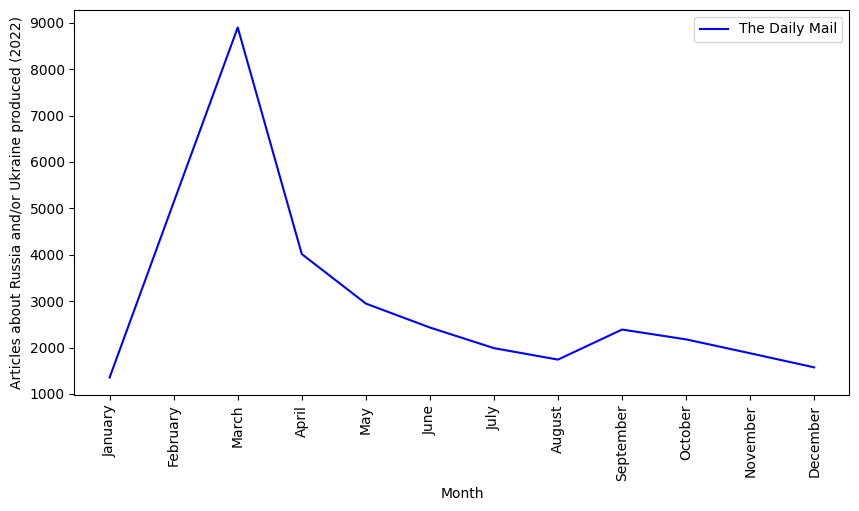

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.xlabel("Month")
plt.ylabel("Articles about Russia and/or Ukraine produced (2022)")
plt.plot(_daily_mail_articles_by_month["Month"], _daily_mail_articles_by_month["Quantity"], label = "The Daily Mail", color = "blue")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

<h2>Collection of Data 2</h2>
<p>Utilizing the URLs to the articles which were scraped scraped in part 1, each article can now be scraped individually for its text data.</p>

In [19]:
from bs4 import BeautifulSoup as bs
import requests
import regex as re

_daily_mail_articles_contents_JANUARY       = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_FEBRUARY      = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_MARCH         = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_APRIL         = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_MAY           = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_JUNE          = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_JULY          = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_AUGUST        = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_SEPTEMBER     = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_OCTOBER       = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_NOVEMBER      = {"Text" : [], "Date" : []}
_daily_mail_articles_contents_DECEMBER      = {"Text" : [], "Date" : []}

def query_article_contents(url, jar = None):
    # Stores additional information pertaining to a HTTP request
    # we would like to invoke for a webpage's HTML content.
    http_headers = {
        "update-insecure-requests" : "1"
    }
    
    if jar:
        webpage = requests.get(url, cookies = jar, headers = http_headers)
    else:
        webpage = requests.get(url, headers = http_headers)
        jar = requests.cookies.RequestsCookieJar()
    
    webpagedata = webpage.text
    soup = bs(webpagedata, "html.parser")
    
    # Retrieve content based on website's HTML structure
    # Main article content.
    content = soup.find('div', attrs = {"itemprop" : "articleBody"}).get_text()
    
    return content


<p>Due to the sheer size of data that will be scraped, it was decided that scraping each month individually provided more stability at the cost of tidiness. If one cell experiences a runtime or network error, this will impact only the data being scraped for the month, and leave the other months unaffected. Alternatively, in the event of an error the entire year worth of content would have to be scraped again. The modularity of the code provides stability.</p>

In [31]:
def query_month(_articles_for_month):
    _content_for_month = {"Text" : [], "Date" : []}
    for article in pd.DataFrame.from_dict(_articles_for_month).values:
        print("Searching content for %s" % str(article[0]) + ", %s" % str(article[1]))
        # Query text content from URL.
        _content_for_month["Text"].append(query_article_contents("https://" + article[0]))
        # Append publication date of article.
        _content_for_month["Date"].append(article[1])
    
    return _content_for_month

<h3>January</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_JANUARY = query_month(_daily_mail_articles_JANUARY)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_JANUARY).to_csv("datasets/_daily_mail_articles_contents_JAN.csv")

<h3>February</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_FEBRUARY = query_month(_daily_mail_articles_FEBRUARY)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_FEBRUARY).to_csv("datasets/_daily_mail_articles_contents_FEB.csv")

<h3>March</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_MARCH = query_month(_daily_mail_articles_MARCH)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_MARCH).to_csv("datasets/_daily_mail_articles_contents_MAR.csv")

<h3>April</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_APRIL = query_month(_daily_mail_articles_APRIL)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_APRIL).to_csv("datasets/_daily_mail_articles_contents_APR.csv")

<h3>May</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_MAY = query_month(_daily_mail_articles_MAY)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_MAY).to_csv("datasets/_daily_mail_articles_contents_MAY.csv")

<h3>June</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_JUNE = query_month(_daily_mail_articles_JUNE)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_JUNE).to_csv("datasets/_daily_mail_articles_contents_JUN.csv")

<h3>July</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_JULY = query_month(_daily_mail_articles_JULY)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_JULY).to_csv("datasets/_daily_mail_articles_contents_JUL.csv")

<h3>August</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_AUGUST = query_month(_daily_mail_articles_AUGUST)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_AUGUST).to_csv("datasets/_daily_mail_articles_contents_AUG.csv")

<h3>September</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_SEPTEMBER = query_month(_daily_mail_articles_SEPTEMBER)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_SEPTEMBER).to_csv("datasets/_daily_mail_articles_contents_SEP.csv")

<h3>October</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_OCTOBER = query_month(_daily_mail_articles_OCTOBER)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_OCTOBER).to_csv("datasets/_daily_mail_articles_contents_OCT.csv")

<h3>November</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_NOVEMBER = query_month(_daily_mail_articles_NOVEMBER)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_NOVEMBER).to_csv("datasets/_daily_mail_articles_contents_NOV.csv")

<h3>December</h3>

In [ ]:
# Get contents
_daily_mail_articles_contents_DECEMBER = query_month(_daily_mail_articles_DECEMBER)

# Save to CSV file locally for future use
pd.DataFrame.from_dict(_daily_mail_articles_contents_DECEMBER).to_csv("datasets/_daily_mail_articles_contents_DEC.csv")

<h2>Preprocessing 1</h2>
<p>Clean text data from articles. Get rid of whitespace, sharing prompts, authors, mentions of alternative articles, etc.</p>
<p>Now that the data is stored locally, it can be loaded into a dataframe for cleansing and subsequent analysis, negating the requirement of webscraping again.</p>

In [1]:
# Import libraries and features for data cleansing and NLP
import nltk
import re
import pandas as pd

nltk.download(['stopwords', 'punkt', 'vader_lexicon'])

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<p>Extract, load, and transform each dataset.</p>

In [10]:
def create_corpus(df):
    """Removes stopwords from articles and applies stemming to yield cleansed text content."""
    # Container for cleaned articles.
    corpus = {"Text" : [], "Date" : []}
    
    for i in range(0, len(df.iloc[:,0])):
        article = re.sub('[^a-zA-Z]', ' ', df["Text"][i])
        article = article.lower()
        article = article.split()
        
        ps = PorterStemmer()
        
        all_stopwords = stopwords.words("english")
        # "not" is an informative word, keep it
        all_stopwords.remove("not")
        
        article = [ps.stem(word) for word in article if not word in set(all_stopwords)]
        
        article = ' '.join(article)
        
        # Append stemmed text and publication date to corpus dictionary
        corpus["Text"].append(article)
        corpus["Date"].append(df["Date"][i])
    
    # Convert corpus from dictionary to a dataframe.        
    corpus = pd.DataFrame.from_dict(corpus)
    
    return corpus

<h3>January</h3>

In [4]:
with open(file = "datasets/_daily_mail_articles_contents_JAN.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JAN22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JAN22_corpus = create_corpus(df_JAN22)

<h3>February</h3>

In [5]:
with open(file = "datasets/_daily_mail_articles_contents_FEB.csv", mode = 'r', encoding = 'utf-8') as f:
    df_FEB22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_FEB22_corpus = create_corpus(df_FEB22)

<h3>March</h3>

In [6]:
with open(file = "datasets/_daily_mail_articles_contents_MAR.csv", mode = 'r', encoding = 'utf-8') as f:
    df_MAR22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_MAR22_corpus = create_corpus(df_MAR22)

<h3>April</h3>

In [7]:
with open(file = "datasets/_daily_mail_articles_contents_APR.csv", mode = 'r', encoding = 'utf-8') as f:
    df_APR22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_APR22_corpus = create_corpus(df_APR22)

<h3>May</h3>

In [8]:
with open(file = "datasets/_daily_mail_articles_contents_MAY.csv", mode = 'r', encoding = 'utf-8') as f:
    df_MAY22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_MAY22_corpus = create_corpus(df_MAY22)

<h3>June</h3>

In [9]:
with open(file = "datasets/_daily_mail_articles_contents_JUN.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JUN22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JUN22_corpus = create_corpus(df_JUN22)

<h3>July</h3>

In [10]:
with open(file = "datasets/_daily_mail_articles_contents_JUL.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JUL22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JUL22_corpus = create_corpus(df_JUL22)

<h3>August</h3>

In [11]:
with open(file = "datasets/_daily_mail_articles_contents_AUG.csv", mode = 'r', encoding = 'utf-8') as f:
    df_AUG22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_AUG22_corpus = create_corpus(df_AUG22)

<h3>September</h3>

In [12]:
with open(file = "datasets/_daily_mail_articles_contents_SEP.csv", mode = 'r', encoding = 'utf-8') as f:
    df_SEP22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_SEP22_corpus = create_corpus(df_SEP22)

<h3>October</h3>

In [13]:
with open(file = "datasets/_daily_mail_articles_contents_OCT.csv", mode = 'r', encoding = 'utf-8') as f:
    df_OCT22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_OCT22_corpus = create_corpus(df_OCT22)

<h3>November</h3>

In [14]:
with open(file = "datasets/_daily_mail_articles_contents_NOV.csv", mode = 'r', encoding = 'utf-8') as f:
    df_NOV22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_NOV22_corpus = create_corpus(df_NOV22)

<h3>December</h3>

In [15]:
with open(file = "datasets/_daily_mail_articles_contents_DEC.csv", mode = 'r', encoding = 'utf-8') as f:
    df_DEC22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_DEC22_corpus = create_corpus(df_DEC22)

<p>The following function returns the number of times a specified word occurs in a given corpus. This is ideal for observing the frequency at which Russia or Russian-related terms are mentioned in comparison to Ukraine or Ukraine-related terms.</p>

In [365]:
def count_instances_of_word(corpus, word = ""):
    """Counts the number of times a given word occurs in a given bag of words."""
    counter = 0
    if(corpus is not None):
        for article in corpus["Text"]:
            if(article.__contains__(word)):
                for x in article.split():
                    if(x == word):
                        counter = counter + 1

        print("{} instances of \'{}\' found".format(counter, word))
    else:
        print("Invalid corpus. Cannot count instances of word.")
    
    return counter


In [367]:
def get_term_frequencies_for_corpuses(corpuses):
    dict_2022_term_frequencies = {
    "Month" : [], 
    "Mentions of Russia" : [], 
    "Mentions of Russian" : [],
    "Mentions of Ukraine" : [],
    "Mentions of Ukrainian": [],
    "Mentions of Putin" : [],
    "Mentions of Zelenski" : []
    }

    dict_2022_term_frequencies["Month"] = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
    ]
    
    for corpus in corpuses:
        dict_2022_term_frequencies["Mentions of Russia"].append(count_instances_of_word(corpus, "russia"))
        dict_2022_term_frequencies["Mentions of Russian"].append(count_instances_of_word(corpus, "russian"))
        dict_2022_term_frequencies["Mentions of Ukraine"].append(count_instances_of_word(corpus, "ukrain"))
        dict_2022_term_frequencies["Mentions of Ukrainian"].append(count_instances_of_word(corpus, "ukrainian"))
        dict_2022_term_frequencies["Mentions of Putin"].append(count_instances_of_word(corpus, "putin"))
        dict_2022_term_frequencies["Mentions of Zelenski"].append(count_instances_of_word(corpus, "zelenski"))
    
    return dict_2022_term_frequencies

In [ ]:
corpuses = [
    df_JAN22_corpus,
    df_FEB22_corpus,
    df_MAR22_corpus,
    df_APR22_corpus,
    df_MAY22_corpus,
    df_JUN22_corpus,
    df_JUL22_corpus,
    df_AUG22_corpus,
    df_SEP22_corpus,
    df_OCT22_corpus,
    df_NOV22_corpus,
    df_DEC22_corpus
]

dict_2022_term_frequencies = get_term_frequencies_for_corpuses(corpuses)

In [373]:
df_2022_term_frequencies = pd.DataFrame.from_dict(dict_2022_term_frequencies)
df_2022_term_frequencies
df_2022_term_frequencies.to_csv("datasets/_term_frequencies_2022.csv")

<div class="alert alert-block alert-success">
<p><b>For primary analysis, run code from here! Run the cells below.</b></p>
</div>

In [379]:
with open(file = "datasets/_term_frequencies_2022.csv", mode = "r", encoding = "utf-8") as f:
    df_2022_term_frequencies = pd.read_csv(f)
    df_2022_term_frequencies = df_2022_term_frequencies.drop(columns = "Unnamed: 0")

In [401]:
df_2022_term_frequencies

,Month,Mentions of Russia,Mentions of Russian,Mentions of Ukraine,Mentions of Ukrainian,Mentions of Putin,Mentions of Zelenski
0,January,10145,7995,10475,2301,3164,289
1,February,36285,36657,44205,15362,18344,2369
2,March,52475,60024,65251,27513,23022,5223
3,April,21519,26913,26247,13103,8373,2289
4,May,14592,17248,18361,8381,6192,1090
5,June,11598,12221,14976,6010,4213,953
6,July,9596,10026,10320,4643,2784,473
7,August,8279,9680,10003,4717,2588,514
8,September,13912,14007,12696,5887,7295,814
9,October,11758,12863,13398,6313,6266,735


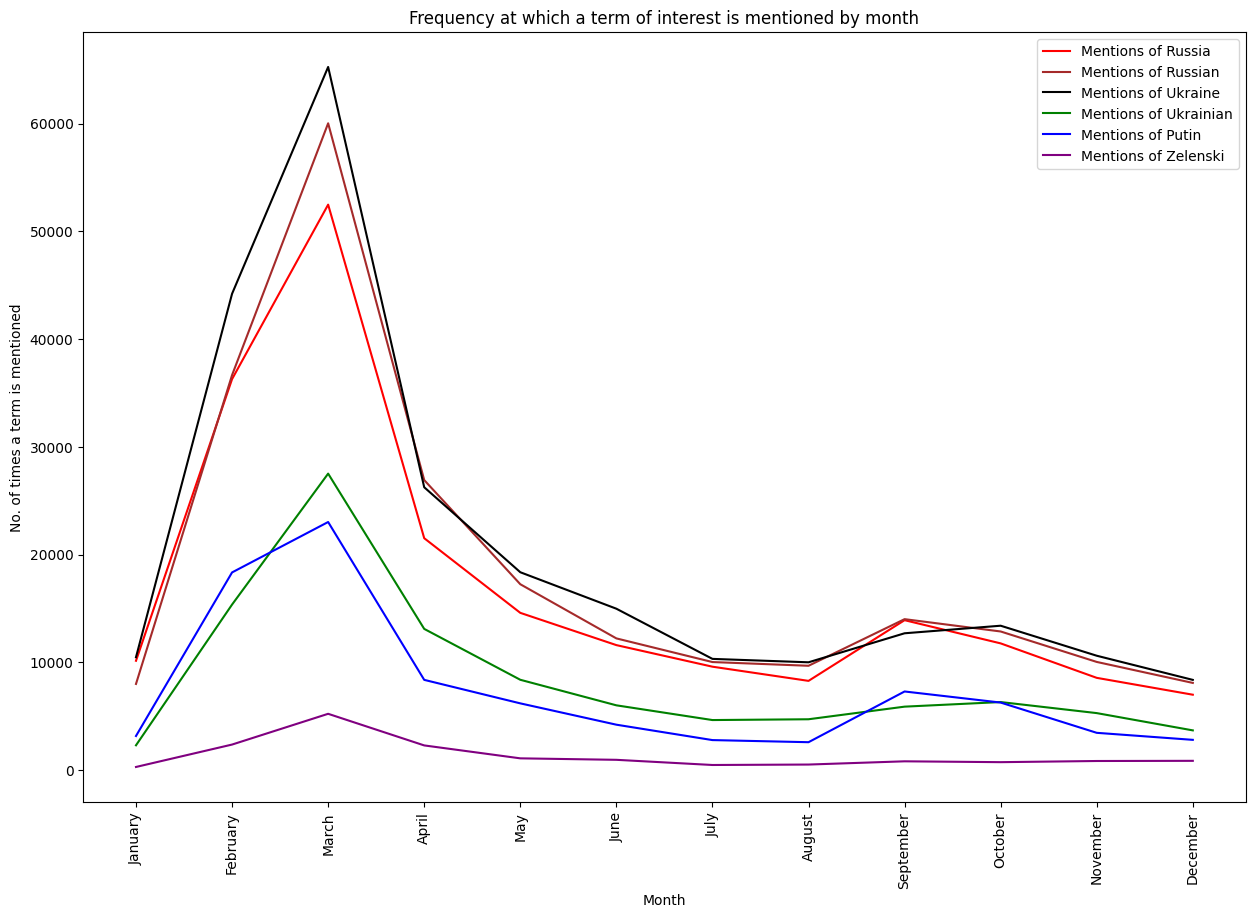

In [396]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = [15, 10])

plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Russia"],     color = "red")
plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Russian"],    color = "brown")
plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Ukraine"],    color = "black")
plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Ukrainian"],  color = "green")
plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Putin"],      color = "blue")
plt.plot(df_2022_term_frequencies["Month"], df_2022_term_frequencies["Mentions of Zelenski"],   color = "purple")

plt.title("Frequency at which a term of interest is mentioned by month")
plt.xlabel("Month")
plt.ylabel("No. of times a term is mentioned")

plt.xticks(rotation = 90)
plt.legend(["Mentions of Russia", "Mentions of Russian", "Mentions of Ukraine", "Mentions of Ukrainian", "Mentions of Putin", "Mentions of Zelenski"])

<AxesSubplot: title={'center': 'Russia vs Ukraine - Term Frequency'}, xlabel='Month'>

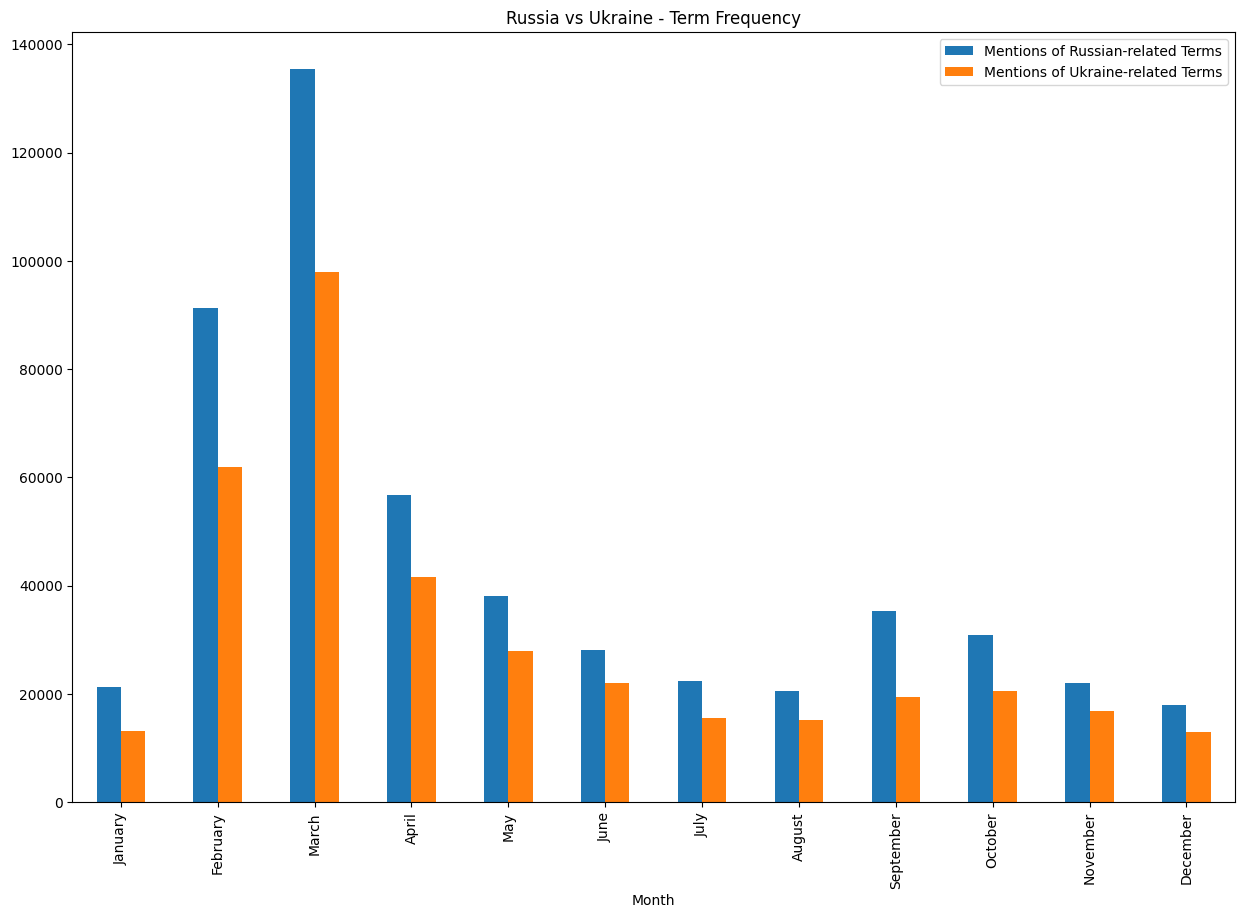

In [464]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

russian_related_terms = np.array([
    df_2022_term_frequencies.iloc[0]["Mentions of Russia"] + df_2022_term_frequencies.iloc[0]["Mentions of Russian"] + df_2022_term_frequencies.iloc[0]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[1]["Mentions of Russia"] + df_2022_term_frequencies.iloc[1]["Mentions of Russian"] + df_2022_term_frequencies.iloc[1]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[2]["Mentions of Russia"] + df_2022_term_frequencies.iloc[2]["Mentions of Russian"] + df_2022_term_frequencies.iloc[2]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[3]["Mentions of Russia"] + df_2022_term_frequencies.iloc[3]["Mentions of Russian"] + df_2022_term_frequencies.iloc[3]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[4]["Mentions of Russia"] + df_2022_term_frequencies.iloc[4]["Mentions of Russian"] + df_2022_term_frequencies.iloc[4]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[5]["Mentions of Russia"] + df_2022_term_frequencies.iloc[5]["Mentions of Russian"] + df_2022_term_frequencies.iloc[5]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[6]["Mentions of Russia"] + df_2022_term_frequencies.iloc[6]["Mentions of Russian"] + df_2022_term_frequencies.iloc[6]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[7]["Mentions of Russia"] + df_2022_term_frequencies.iloc[7]["Mentions of Russian"] + df_2022_term_frequencies.iloc[7]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[8]["Mentions of Russia"] + df_2022_term_frequencies.iloc[8]["Mentions of Russian"] + df_2022_term_frequencies.iloc[8]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[9]["Mentions of Russia"] + df_2022_term_frequencies.iloc[9]["Mentions of Russian"] + df_2022_term_frequencies.iloc[9]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[10]["Mentions of Russia"] + df_2022_term_frequencies.iloc[10]["Mentions of Russian"] + df_2022_term_frequencies.iloc[10]["Mentions of Putin"],
    df_2022_term_frequencies.iloc[11]["Mentions of Russia"] + df_2022_term_frequencies.iloc[11]["Mentions of Russian"] + df_2022_term_frequencies.iloc[11]["Mentions of Putin"]
])

ukraine_related_terms = np.array([
    df_2022_term_frequencies.iloc[0]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[0]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[0]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[1]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[1]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[1]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[2]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[2]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[2]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[3]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[3]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[3]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[4]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[4]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[4]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[5]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[5]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[5]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[6]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[6]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[6]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[7]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[7]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[7]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[8]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[8]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[8]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[9]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[9]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[9]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[10]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[10]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[10]["Mentions of Zelenski"],
    df_2022_term_frequencies.iloc[11]["Mentions of Ukraine"] + df_2022_term_frequencies.iloc[11]["Mentions of Ukrainian"] + df_2022_term_frequencies.iloc[11]["Mentions of Zelenski"]
])

temp_dict = {"Month" : df_2022_term_frequencies["Month"], "Mentions of Russian-related Terms" : russian_related_terms, "Mentions of Ukraine-related Terms" : ukraine_related_terms}
df_2022_term_frequencies_totals = pd.DataFrame.from_dict(temp_dict)

df_2022_term_frequencies_totals.plot(
    x = "Month", 
    y = ["Mentions of Russian-related Terms", "Mentions of Ukraine-related Terms"], 
    kind = "bar", 
    title = "Russia vs Ukraine - Term Frequency", 
    figsize = [15,10]
    )

<h2>Sentiment Analysis 1</h2>
<p>Investigate occurances of anti-Russian sentiment in newspapers based on the definition above.</p>
<p>Determine the probability distributions for sentiments across both newspapers. Also try plotting the sentiment over time.</p>
<p>Cross reference sentiment with European Gas Prices as per the TTF (see first CW).</p>

In [4]:
# Import libraries and features for data cleansing and NLP
import nltk
import re
import pandas as pd

nltk.download(['stopwords', 'punkt', 'vader_lexicon'])

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\berw9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
def summarize_frequency_dist(corpus, tabulations):
    for i in range(0, len(corpus)):
        words = nltk.word_tokenize(corpus.iloc[i]["Text"])
        dist = nltk.FreqDist(words)
        dist.tabulate(tabulations)

In [12]:
def summarize_concordance(corpus, word, lines):
    for i in range(0, len(corpus)):
        text = nltk.Text(corpus.iloc[i]["Text"])
        text.concordance(word, lines)

In [13]:
def summarize_sentiment(corpus):
    # Create a dictionary to store the sentiment of the articles.
    sentiment_of_articles = {"Sentiment" : [], "Date" : []}
    
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Corpus contains tidied text data for each article.
    # Run for each article in each corpus.
    for article_content in corpus["Text"]:
        # Assess sentiment for each article
        pos         = sia.polarity_scores(article_content)['pos']
        neg         = sia.polarity_scores(article_content)['neg']
        neu         = sia.polarity_scores(article_content)['neu']
        compound    = sia.polarity_scores(article_content)['compound']
        
        if compound >= 0.05:
            print("Sentiment is positive")
            sentiment_of_articles["Sentiment"].append("Positive")
        elif compound <= -0.05:
            print("Sentiment is negative")
            sentiment_of_articles["Sentiment"].append("Negative")
        else:
            print("Sentiment is neutral")
            sentiment_of_articles["Sentiment"].append("Neutral")
    
    # Do not forget the dates!
    for article_date in corpus["Date"]:
        sentiment_of_articles["Date"].append(article_date)
    
    sentiment_of_articles = pd.DataFrame.from_dict(sentiment_of_articles)
    return sentiment_of_articles

In [14]:
def assess_article_sentiment_distribution(df_sentiment):
    positive_count  = 0
    neutral_count   = 0
    negative_count  = 0
    
    for x in df_sentiment["Sentiment"]:
        if x == "Positive":
            positive_count = positive_count + 1
        elif x == "Neutral":
            neutral_count = neutral_count + 1
        elif x == "Negative":
            negative_count = negative_count + 1
    
    print("{} instances assessed.".format(positive_count + neutral_count + negative_count))
    print("{} positive instances found.".format(positive_count))
    print("{} neutral instances found.".format(neutral_count))
    print("{} negative instances found.".format(negative_count))
    
    # Return a dictionary containing subtotal no. of articles, and positive, neutral and negative counts.
    sentiment_distribution = {"Total" : [], "Positive" : [], "Neutral" : [], "Negative" : []}
    sentiment_distribution["Positive"].append(positive_count)
    sentiment_distribution["Neutral"].append(neutral_count)
    sentiment_distribution["Negative"].append(negative_count)
    sentiment_distribution["Total"].append(positive_count + neutral_count + negative_count)
    
    return sentiment_distribution

<h3>January</h3>

In [ ]:
df_JAN22_sentiments = summarize_sentiment(df_JAN22_corpus)
df_JAN22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_JAN.csv")

In [172]:
with open(file = "datasets/_daily_mail_articles_sentiments_JAN.csv", mode = "r", encoding = "utf-8") as f:
    df_JAN22_sentiments = pd.read_csv(f)
    df_JAN22_sentiments = df_JAN22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_JAN22 = assess_article_sentiment_distribution(df_JAN22_sentiments)

1355 instances assessed.
410 positive instances found.
45 neutral instances found.
900 negative instances found.


<h3>February</h3>

In [ ]:
df_FEB22_sentiments = summarize_sentiment(df_FEB22_corpus)
df_FEB22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_FEB.csv")

In [173]:
with open(file = "datasets/_daily_mail_articles_sentiments_FEB.csv", mode = "r", encoding = "utf-8") as f:
    df_FEB22_sentiments = pd.read_csv(f)
    df_FEB22_sentiments = df_FEB22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_FEB22 = assess_article_sentiment_distribution(df_FEB22_sentiments)

5131 instances assessed.
1704 positive instances found.
143 neutral instances found.
3284 negative instances found.


<h3>March</h3>

In [ ]:
df_MAR22_sentiments = summarize_sentiment(df_MAR22_corpus)
df_MAR22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_MAR.csv")

In [174]:
with open(file = "datasets/_daily_mail_articles_sentiments_MAR.csv", mode = "r", encoding = "utf-8") as f:
    df_MAR22_sentiments = pd.read_csv(f)
    df_MAR22_sentiments = df_MAR22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_MAR22 = assess_article_sentiment_distribution(df_MAR22_sentiments)

8899 instances assessed.
3059 positive instances found.
168 neutral instances found.
5672 negative instances found.


<h3>April</h3>

In [ ]:
df_APR22_sentiments = summarize_sentiment(df_APR22_corpus)
df_APR22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_APR.csv")

In [175]:
with open(file = "datasets/_daily_mail_articles_sentiments_APR.csv", mode = "r", encoding = "utf-8") as f:
    df_APR22_sentiments = pd.read_csv(f)
    df_APR22_sentiments = df_APR22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_APR22 = assess_article_sentiment_distribution(df_APR22_sentiments)

4015 instances assessed.
1108 positive instances found.
83 neutral instances found.
2824 negative instances found.


<h3>May</h3>

In [ ]:
df_MAY22_sentiments = summarize_sentiment(df_MAY22_corpus)
df_MAY22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_MAY.csv")

In [177]:
with open(file = "datasets/_daily_mail_articles_sentiments_MAY.csv", mode = "r", encoding = "utf-8") as f:
    df_MAY22_sentiments = pd.read_csv(f)
    df_MAY22_sentiments = df_MAY22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_MAY22 = assess_article_sentiment_distribution(df_MAY22_sentiments)

2948 instances assessed.
958 positive instances found.
52 neutral instances found.
1938 negative instances found.


<h3>June</h3>

In [ ]:
df_JUN22_sentiments = summarize_sentiment(df_JUN22_corpus)
df_JUN22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_JUN.csv")

In [178]:
with open(file = "datasets/_daily_mail_articles_sentiments_JUN.csv", mode = "r", encoding = "utf-8") as f:
    df_JUN22_sentiments = pd.read_csv(f)
    df_JUN22_sentiments = df_JUN22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_JUN22 = assess_article_sentiment_distribution(df_JUN22_sentiments)

2432 instances assessed.
787 positive instances found.
48 neutral instances found.
1597 negative instances found.


<h3>July</h3>

In [ ]:
df_JUL22_sentiments = summarize_sentiment(df_JUL22_corpus)
df_JUL22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_JUL.csv")

In [179]:
with open(file = "datasets/_daily_mail_articles_sentiments_JUL.csv", mode = "r", encoding = "utf-8") as f:
    df_JUL22_sentiments = pd.read_csv(f)
    df_JUL22_sentiments = df_JUL22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_JUL22 = assess_article_sentiment_distribution(df_JUL22_sentiments)

1987 instances assessed.
652 positive instances found.
28 neutral instances found.
1307 negative instances found.


<h3>August</h3>

In [ ]:
df_AUG22_sentiments = summarize_sentiment(df_AUG22_corpus)
df_AUG22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_AUG.csv")

In [180]:
with open(file = "datasets/_daily_mail_articles_sentiments_AUG.csv", mode = "r", encoding = "utf-8") as f:
    df_AUG22_sentiments = pd.read_csv(f)
    df_AUG22_sentiments = df_AUG22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_AUG22 = assess_article_sentiment_distribution(df_AUG22_sentiments)

1740 instances assessed.
516 positive instances found.
33 neutral instances found.
1191 negative instances found.


<h3>September</h3>

In [ ]:
df_SEP22_sentiments = summarize_sentiment(df_SEP22_corpus)
df_SEP22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_SEP.csv")

In [181]:
with open(file = "datasets/_daily_mail_articles_sentiments_SEP.csv", mode = "r", encoding = "utf-8") as f:
    df_SEP22_sentiments = pd.read_csv(f)
    df_SEP22_sentiments = df_SEP22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_SEP22 = assess_article_sentiment_distribution(df_SEP22_sentiments)

2388 instances assessed.
694 positive instances found.
67 neutral instances found.
1627 negative instances found.


<h3>October</h3>

In [ ]:
df_OCT22_sentiments = summarize_sentiment(df_OCT22_corpus)
df_OCT22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_OCT.csv")

In [182]:
with open(file = "datasets/_daily_mail_articles_sentiments_OCT.csv", mode = "r", encoding = "utf-8") as f:
    df_OCT22_sentiments = pd.read_csv(f)
    df_OCT22_sentiments = df_OCT22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_OCT22 = assess_article_sentiment_distribution(df_OCT22_sentiments)

2176 instances assessed.
532 positive instances found.
40 neutral instances found.
1604 negative instances found.


<h3>November</h3>

In [ ]:
df_NOV22_sentiments = summarize_sentiment(df_NOV22_corpus)
df_NOV22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_NOV.csv")

In [183]:
with open(file = "datasets/_daily_mail_articles_sentiments_NOV.csv", mode = "r", encoding = "utf-8") as f:
    df_NOV22_sentiments = pd.read_csv(f)
    df_NOV22_sentiments = df_NOV22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_NOV22 = assess_article_sentiment_distribution(df_NOV22_sentiments)

1877 instances assessed.
503 positive instances found.
35 neutral instances found.
1339 negative instances found.


<h3>December</h3>

In [ ]:
df_DEC22_sentiments = summarize_sentiment(df_DEC22_corpus)
df_DEC22_sentiments.to_csv("datasets/_daily_mail_articles_sentiments_DEC.csv")

In [184]:
with open(file = "datasets/_daily_mail_articles_sentiments_DEC.csv", mode = "r", encoding = "utf-8") as f:
    df_DEC22_sentiments = pd.read_csv(f)
    df_DEC22_sentiments = df_DEC22_sentiments.drop("Unnamed: 0", axis = "columns")
    sentiment_dist_DEC22 = assess_article_sentiment_distribution(df_DEC22_sentiments)

1573 instances assessed.
437 positive instances found.
31 neutral instances found.
1105 negative instances found.


<p>Cache distributions into a list.</p>

In [194]:
list_2022_sentiment_dists = [
    sentiment_dist_JAN22,
    sentiment_dist_FEB22,
    sentiment_dist_MAR22,
    sentiment_dist_APR22,
    sentiment_dist_MAY22,
    sentiment_dist_JUN22,
    sentiment_dist_JUL22,
    sentiment_dist_AUG22,
    sentiment_dist_SEP22,
    sentiment_dist_OCT22,
    sentiment_dist_NOV22,
    sentiment_dist_DEC22
]

<h2>Visualization 2</h2>
<p>Plot the sentiment of each month.</p>

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def assess_sentiments_for_2022(list_of_sentiment_dists):
    x = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December"
        ]

    # Positive sentiments
    positive_scores = []
    
    for dist in list_of_sentiment_dists:
        positive_scores.append(dist["Positive"][0])
        
    positive_scores = np.array(positive_scores)
    
    # Neutral sentiments
    neutral_scores = []
    
    for dist in list_of_sentiment_dists:
        neutral_scores.append(dist["Neutral"][0])
        
    neutral_scores = np.array(neutral_scores)
    
    # Negative sentiments
    negative_scores = []
    
    for dist in list_of_sentiment_dists:
        negative_scores.append(dist["Negative"][0])
        
    negative_scores = np.array(negative_scores)

    dict_2022_sentiments = {"Month" : x, "Positive Sentiments" : positive_scores, "Neutral Sentiments" : neutral_scores, "Negative Sentiments" : negative_scores}
    
    return dict_2022_sentiments


<p>Save the sentiment distributions for 2022 locally for later use.</p>

In [227]:
dict_2022_sentiments = assess_sentiments_for_2022(list_2022_sentiment_dists)
df_2022_sentiments = pd.DataFrame.from_dict(dict_2022_sentiments)

In [228]:
df_2022_sentiments.to_csv("datasets/_daily_mail_article_sentiments_distributions_2022.csv")

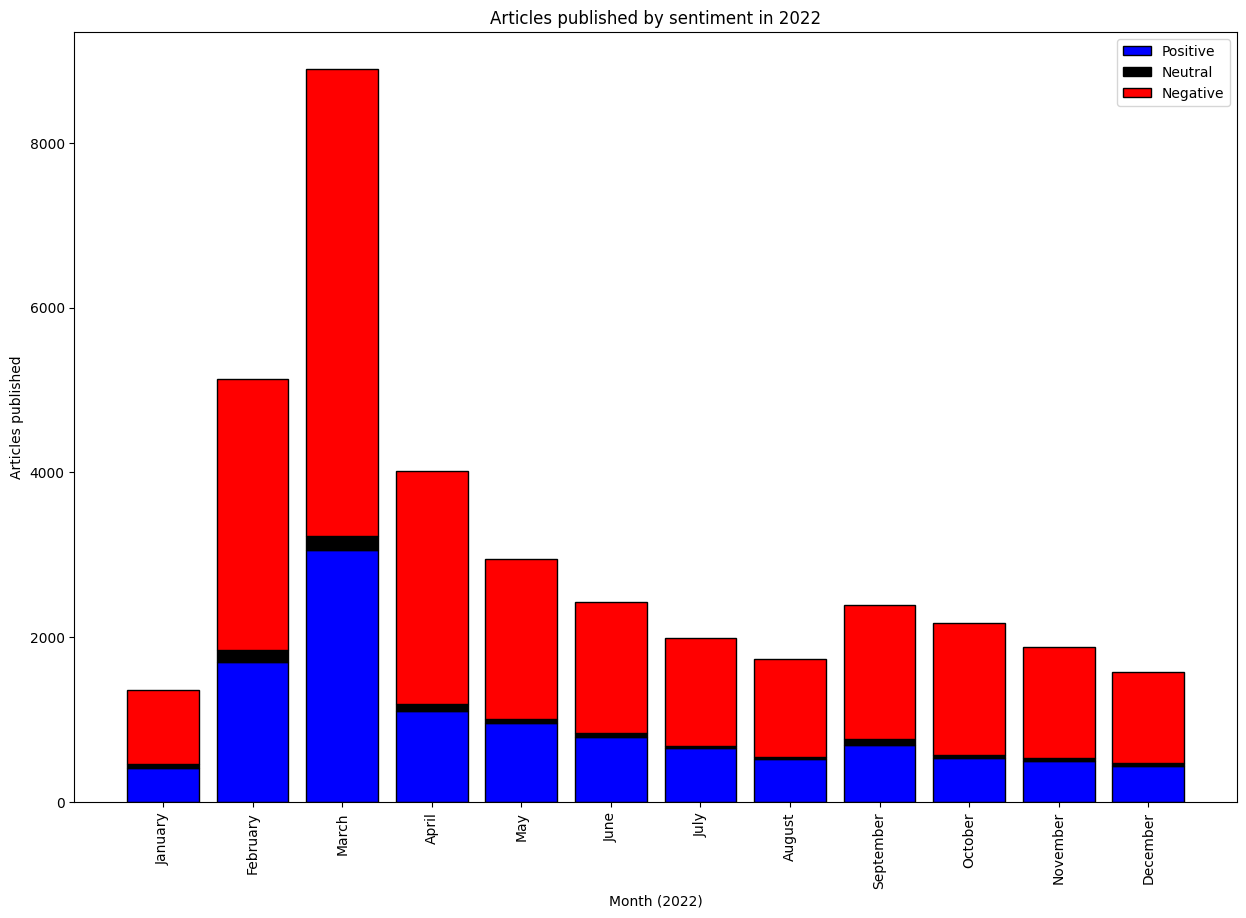

In [229]:
plt.figure(figsize = (15,10))
plt.bar(df_2022_sentiments["Month"], df_2022_sentiments["Positive Sentiments"], color = "blue", edgecolor = "black")
plt.bar(df_2022_sentiments["Month"], df_2022_sentiments["Neutral Sentiments"], bottom = df_2022_sentiments["Positive Sentiments"], color = "black", edgecolor = "black")
plt.bar(df_2022_sentiments["Month"], df_2022_sentiments["Negative Sentiments"], bottom = df_2022_sentiments["Positive Sentiments"] + df_2022_sentiments["Neutral Sentiments"], color = "red", edgecolor = "black")
plt.legend(["Positive", "Neutral", "Negative"])
plt.title("Articles published by sentiment in 2022")
plt.xlabel("Month (2022)")
plt.ylabel("Articles published")
plt.xticks(rotation = 90)
plt.show()

<p>The overall sentiment of articles produced in 2022 can be visualized with a rudimentary pie chart.</p>

In [230]:
def generate_pie_chart(df): 
    # Positive articles
    positive_subtotal_2022 = 0
    for score in df["Positive Sentiments"]:
        positive_subtotal_2022 = positive_subtotal_2022 + score
        
    print("Positive sentiments in 2022: {}".format(positive_subtotal_2022))

    # Neutral articles
    neutral_subtotal_2022 = 0
    for score in df["Neutral Sentiments"]:
        neutral_subtotal_2022 = neutral_subtotal_2022 + score
        
    print("Neutral sentiments in 2022: {}".format(neutral_subtotal_2022))

    # Negative articles
    negative_subtotal_2022 = 0
    for score in df["Negative Sentiments"]:
        negative_subtotal_2022 = negative_subtotal_2022 + score
        
    print("Negative sentiments in 2022: {}".format(negative_subtotal_2022))

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np

    subtotals = [positive_subtotal_2022, neutral_subtotal_2022, negative_subtotal_2022]
    subtotal = positive_subtotal_2022 + neutral_subtotal_2022 + negative_subtotal_2022

    plt.pie(x = subtotals, labels = [
        "Positive: {}%".format(round(100* positive_subtotal_2022/subtotal, 2)), 
        "Neutral: {}%".format(round(100 * neutral_subtotal_2022/subtotal, 2)), 
        "Negative: {}%".format(round(100 * negative_subtotal_2022/subtotal, 2))], 
        colors = ["blue", "black", "red"])
    plt.title("Proportion of sentiment across articles in 2022")
    plt.show()

Positive sentiments in 2022: 11360
Neutral sentiments in 2022: 773
Negative sentiments in 2022: 24388


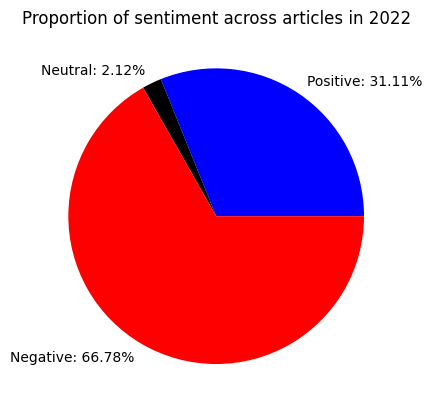

In [231]:
generate_pie_chart(df_2022_sentiments)

<h2>Preprocessing 2</h2>
<p>Encode predicted sentiment into discrete values for training. The discrete values we have to work with are "positive", "neutral", and "nnegative" sentiments.</p>
<p>Respectively, these may be encoded as dummy variables as follows:
    <ul>
        <li>"positive"  = [1,0,0]</li>
        <li>"neutral"   = [0,1,0]</li>
        <li>"negative"  = [0,0,1]</li>
    </ul>
</p>
<p>Utilizing these dummy variables, we can apply them to create a regressional model.</p>
<p>This model may then be trained and subsequently used to make predictions for the number of positive, neutral and negative articles per month, such that the number of articles produced for a given month constitutes the response variable of the model, and the months as our predictor variable and time series.</p>

<h3>Formatting Date</h3>
<p>For the sake of convenience it is also necessary to interpret the date associated with each article sentiment as the day in the current month, the latter being implied via the dataframe variable name.</p>
<p>In doing so, it will be possible to conduct exploratory data analysis using the days of the target month and the sentiment associated with each one.</p>

In [170]:
def date_to_day(df):
    """Single out the year and month in the date of an observation and erase it, leaving just the day."""
    for i in range(0, len(df["Date"])):
        if df["Date"][i].__contains__("-1-"):
            df["Date"][i] = df["Date"][i].replace("2022-1-", "")
        elif df["Date"][i].__contains__("-2-"):
            df["Date"][i] = df["Date"][i].replace("2022-2-", "")
        elif df["Date"][i].__contains__("-3-"):
            df["Date"][i] = df["Date"][i].replace("2022-3-", "")
        elif df["Date"][i].__contains__("-4-"):
            df["Date"][i] = df["Date"][i].replace("2022-4-", "")
        elif df["Date"][i].__contains__("-5-"):
            df["Date"][i] = df["Date"][i].replace("2022-5-", "")
        elif df["Date"][i].__contains__("-6-"):
            df["Date"][i] = df["Date"][i].replace("2022-6-", "")
        elif df["Date"][i].__contains__("-7-"):
            df["Date"][i] = df["Date"][i].replace("2022-7-", "")
        elif df["Date"][i].__contains__("-8-"):
            df["Date"][i] = df["Date"][i].replace("2022-8-", "")
        elif df["Date"][i].__contains__("-9-"):
            df["Date"][i] = df["Date"][i].replace("2022-9-", "")
        elif df["Date"][i].__contains__("-10-"):
            df["Date"][i] = df["Date"][i].replace("2022-10-", "")
        elif df["Date"][i].__contains__("-11-"):
            df["Date"][i] = df["Date"][i].replace("2022-11-", "")
        elif df["Date"][i].__contains__("-12-"):
            df["Date"][i] = df["Date"][i].replace("2022-12-", "")
        
        df["Date"][i] = int(df["Date"][i])
    
    return df
            
        

In [ ]:
df_JAN22_sentiments = date_to_day(df_JAN22_sentiments)
df_JAN22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_JAN22_sentiments

df_FEB22_sentiments = date_to_day(df_FEB22_sentiments)
df_FEB22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_FEB22_sentiments

df_MAR22_sentiments = date_to_day(df_MAR22_sentiments)
df_MAR22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_MAR22_sentiments

df_APR22_sentiments = date_to_day(df_APR22_sentiments)
df_APR22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_APR22_sentiments

df_MAY22_sentiments = date_to_day(df_MAY22_sentiments)
df_MAY22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_MAY22_sentiments

df_JUN22_sentiments = date_to_day(df_JUN22_sentiments)
df_JUN22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_JUN22_sentiments

df_JUL22_sentiments = date_to_day(df_JUL22_sentiments)
df_JUL22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_JUL22_sentiments

df_AUG22_sentiments = date_to_day(df_AUG22_sentiments)
df_AUG22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_AUG22_sentiments

df_SEP22_sentiments = date_to_day(df_SEP22_sentiments)
df_SEP22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_SEP22_sentiments

df_OCT22_sentiments = date_to_day(df_OCT22_sentiments)
df_OCT22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_OCT22_sentiments

df_NOV22_sentiments = date_to_day(df_NOV22_sentiments)
df_NOV22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_NOV22_sentiments

df_DEC22_sentiments = date_to_day(df_DEC22_sentiments)
df_DEC22_sentiments.rename(columns = {'Date' : 'Day'}, inplace = True)
df_DEC22_sentiments

<h3>Generating Dummy Variables</h3>

In [438]:
import pandas as pd

def produce_dummy_variables(df):
    df = pd.concat(
        [df, pd.get_dummies(df["Sentiment"]).reindex(df.index)], 
        axis = 1
        )
    df = df.drop("Sentiment", axis = "columns")
    
    return df

In [439]:
df_JAN22_sentiments = produce_dummy_variables(df_JAN22_sentiments)
df_FEB22_sentiments = produce_dummy_variables(df_FEB22_sentiments)
df_MAR22_sentiments = produce_dummy_variables(df_MAR22_sentiments)
df_APR22_sentiments = produce_dummy_variables(df_APR22_sentiments)
df_MAY22_sentiments = produce_dummy_variables(df_MAY22_sentiments)
df_JUN22_sentiments = produce_dummy_variables(df_JUN22_sentiments)
df_JUL22_sentiments = produce_dummy_variables(df_JUL22_sentiments)
df_AUG22_sentiments = produce_dummy_variables(df_AUG22_sentiments)
df_SEP22_sentiments = produce_dummy_variables(df_SEP22_sentiments)
df_OCT22_sentiments = produce_dummy_variables(df_OCT22_sentiments)
df_NOV22_sentiments = produce_dummy_variables(df_NOV22_sentiments)
df_DEC22_sentiments = produce_dummy_variables(df_DEC22_sentiments)

<h2>Data Analysis 1</h2>
<p>With the data retrieved and cleaned thus far, various correlations may be measured and drawn. Although, this project focuses primarily on anti-Russian sentiment and European gas prices, such that the following correlations are of particular interest:
    <ul>
        <li>No. of negative articles VS No. of Russia-related terms mentioned</li>
        <li>No. of negative articles VS Price of natural gas in Europe (TTF)</li>
        <li>No. of Russia-related terms mentioned VS Price of natural gas in Europe (TTF)</li>
    </ul>

Strong correlations act as potential grounds for modelling.
</p>

In [440]:
df_JAN22_corr = df_JAN22_sentiments.corr(method = "pearson", numeric_only = False)
df_FEB22_corr = df_FEB22_sentiments.corr(method = "pearson", numeric_only = False)
df_MAR22_corr = df_MAR22_sentiments.corr(method = "pearson", numeric_only = False)
df_APR22_corr = df_APR22_sentiments.corr(method = "pearson", numeric_only = False)
df_MAY22_corr = df_MAY22_sentiments.corr(method = "pearson", numeric_only = False)
df_JUN22_corr = df_JUN22_sentiments.corr(method = "pearson", numeric_only = False)
df_JUL22_corr = df_JUL22_sentiments.corr(method = "pearson", numeric_only = False)
df_AUG22_corr = df_AUG22_sentiments.corr(method = "pearson", numeric_only = False)
df_SEP22_corr = df_SEP22_sentiments.corr(method = "pearson", numeric_only = False)
df_OCT22_corr = df_OCT22_sentiments.corr(method = "pearson", numeric_only = False)
df_NOV22_corr = df_NOV22_sentiments.corr(method = "pearson", numeric_only = False)
df_DEC22_corr = df_DEC22_sentiments.corr(method = "pearson", numeric_only = False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

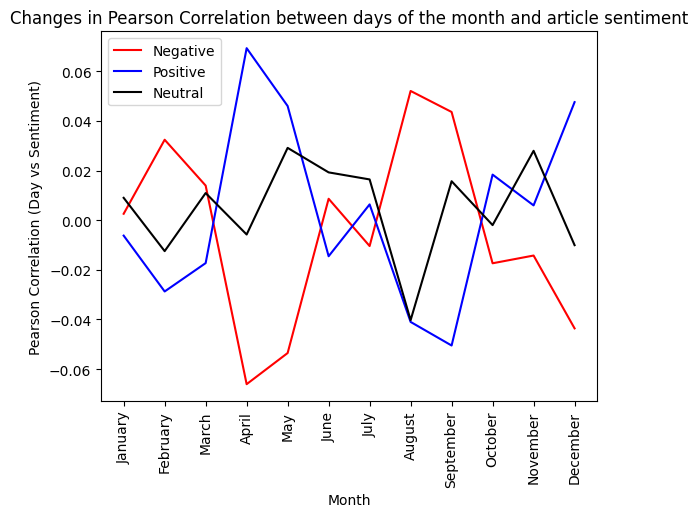

In [441]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
    ]

y1 = [
    df_JAN22_corr["Day"]["Negative"],
    df_FEB22_corr["Day"]["Negative"],
    df_MAR22_corr["Day"]["Negative"],
    df_APR22_corr["Day"]["Negative"],
    df_MAY22_corr["Day"]["Negative"],
    df_JUN22_corr["Day"]["Negative"],
    df_JUL22_corr["Day"]["Negative"],
    df_AUG22_corr["Day"]["Negative"],
    df_SEP22_corr["Day"]["Negative"],
    df_OCT22_corr["Day"]["Negative"],
    df_NOV22_corr["Day"]["Negative"],
    df_DEC22_corr["Day"]["Negative"]
]

y2 = [
    df_JAN22_corr["Day"]["Positive"],
    df_FEB22_corr["Day"]["Positive"],
    df_MAR22_corr["Day"]["Positive"],
    df_APR22_corr["Day"]["Positive"],
    df_MAY22_corr["Day"]["Positive"],
    df_JUN22_corr["Day"]["Positive"],
    df_JUL22_corr["Day"]["Positive"],
    df_AUG22_corr["Day"]["Positive"],
    df_SEP22_corr["Day"]["Positive"],
    df_OCT22_corr["Day"]["Positive"],
    df_NOV22_corr["Day"]["Positive"],
    df_DEC22_corr["Day"]["Positive"]
]

y3 = [
    df_JAN22_corr["Day"]["Neutral"],
    df_FEB22_corr["Day"]["Neutral"],
    df_MAR22_corr["Day"]["Neutral"],
    df_APR22_corr["Day"]["Neutral"],
    df_MAY22_corr["Day"]["Neutral"],
    df_JUN22_corr["Day"]["Neutral"],
    df_JUL22_corr["Day"]["Neutral"],
    df_AUG22_corr["Day"]["Neutral"],
    df_SEP22_corr["Day"]["Neutral"],
    df_OCT22_corr["Day"]["Neutral"],
    df_NOV22_corr["Day"]["Neutral"],
    df_DEC22_corr["Day"]["Neutral"]
]

plt.plot(x, y1, color = "red")
plt.plot(x, y2, color = "blue")
plt.plot(x, y3, color = "black")
plt.legend(["Negative", "Positive", "Neutral"])
plt.xlabel("Month")
plt.ylabel("Pearson Correlation (Day vs Sentiment)")
plt.title("Changes in Pearson Correlation between days of the month and article sentiment")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'End-to-end change in Pearson Correlation between days of the month and article sentiment')

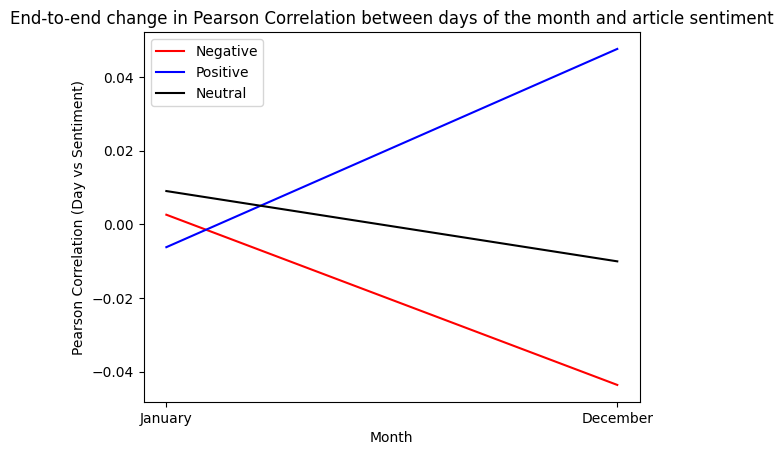

In [442]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [
    "January",
    "December"
    ]

y1 = [
    df_JAN22_corr["Day"]["Negative"],
    df_DEC22_corr["Day"]["Negative"]
]

y2 = [
    df_JAN22_corr["Day"]["Positive"],
    df_DEC22_corr["Day"]["Positive"]
]

y3 = [
    df_JAN22_corr["Day"]["Neutral"],
    df_DEC22_corr["Day"]["Neutral"]
]

plt.plot(x, y1, color = "red")
plt.plot(x, y2, color = "blue")
plt.plot(x, y3, color = "black")
plt.legend(["Negative", "Positive", "Neutral"])
plt.xlabel("Month")
plt.ylabel("Pearson Correlation (Day vs Sentiment)")
plt.title("End-to-end change in Pearson Correlation between days of the month and article sentiment")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

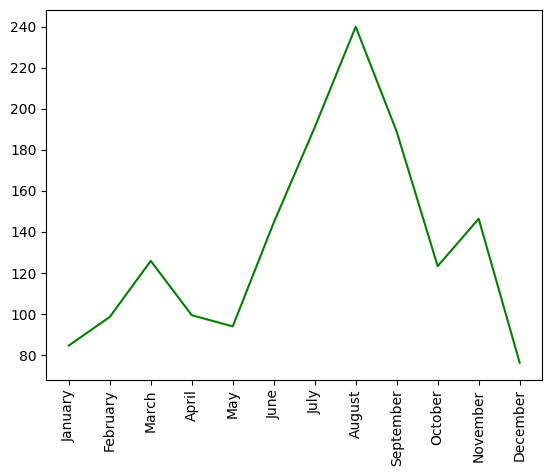

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

with open(file = "datasets/Dutch_TTF_Natural_Gas_Futures_Historical_Data.csv", mode = "r", encoding = "utf-8") as f:
    df_TTF22 = pd.read_csv(f)
    df_TTF22 = df_TTF22.drop([0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], axis = "rows")
    df_TTF22 = df_TTF22.drop(["Open", "High", "Low", "Vol.", "Change %"], axis = "columns")
    df_TTF22 = df_TTF22.sort_values(by = "Date", ascending = True)
    df_TTF22.rename(columns = {"Date" : "Month"}, inplace = True)
    df_TTF22["Month"] = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December"
        ]

plt.plot(df_TTF22["Month"], df_TTF22["Price"], color = "green")
plt.xticks(rotation = 90)

In [234]:
with open(file = "datasets/_daily_mail_article_sentiments_distributions_2022.csv", mode = "r", encoding = "utf-8") as f:
    df_2022_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")

In [235]:
df_2022_sentiments

,Month,Positive Sentiments,Neutral Sentiments,Negative Sentiments
0,January,410,45,900
1,February,1704,143,3284
2,March,3059,168,5672
3,April,1108,83,2824
4,May,958,52,1938
5,June,787,48,1597
6,July,652,28,1307
7,August,516,33,1191
8,September,694,67,1627
9,October,532,40,1604


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

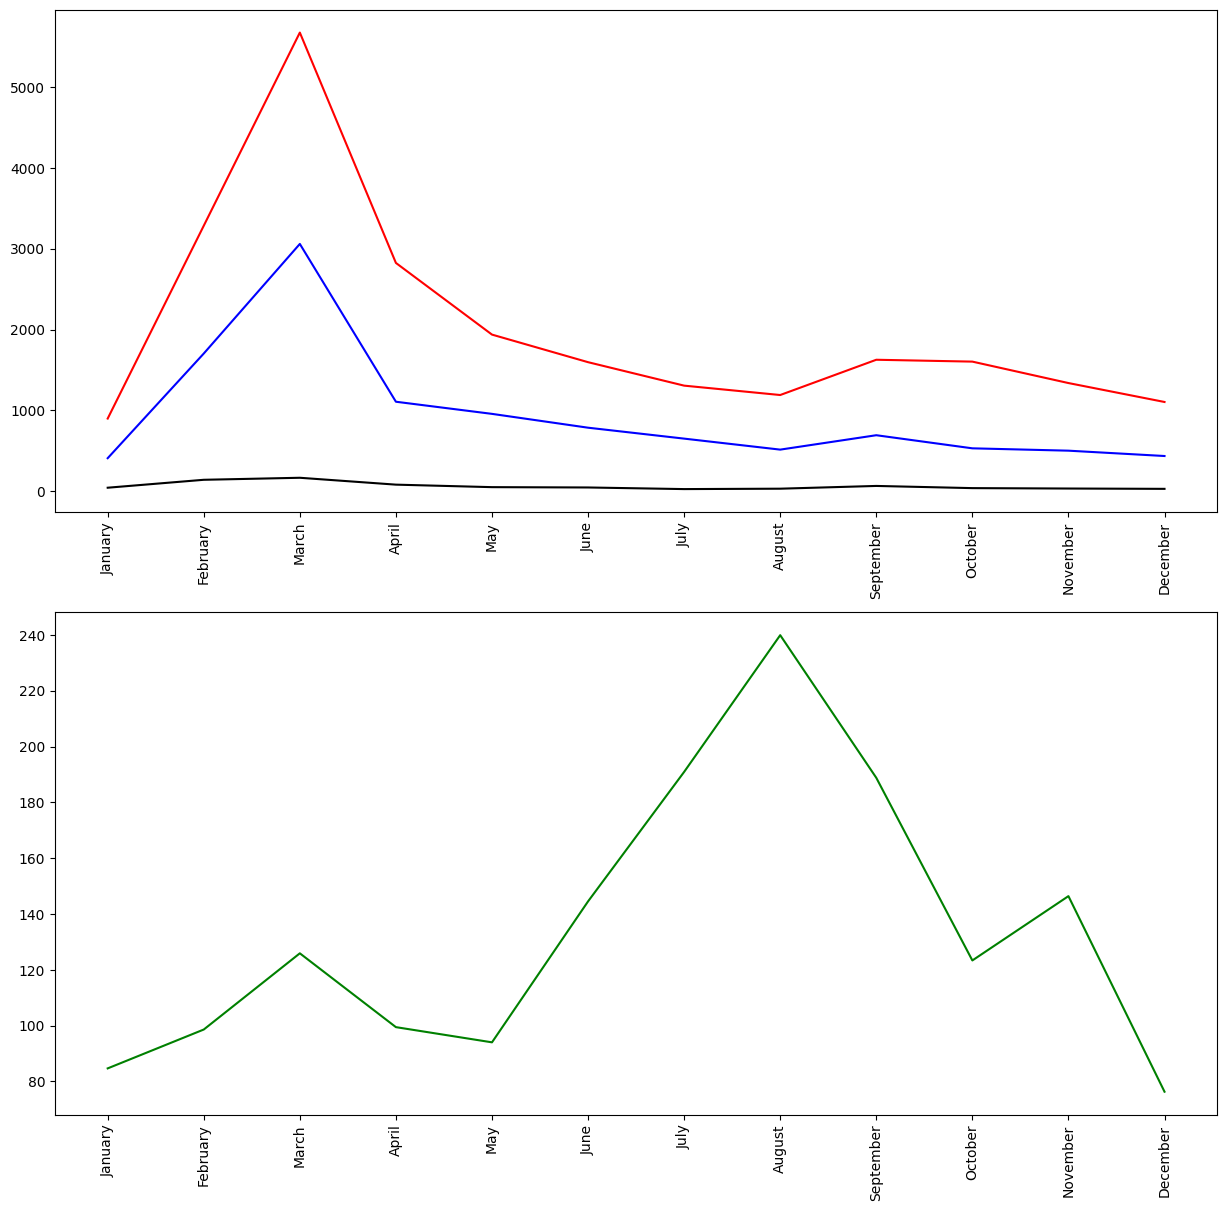

In [293]:
plt.figure(figsize=[15,30])
plt.subplot(4, 1, 1)
plt.plot(df_2022_sentiments["Month"], df_2022_sentiments["Positive Sentiments"], color = "blue")
plt.plot(df_2022_sentiments["Month"], df_2022_sentiments["Neutral Sentiments"], color = "black")
plt.plot(df_2022_sentiments["Month"], df_2022_sentiments["Negative Sentiments"], color = "red")
plt.xticks(rotation = 90)
plt.subplot(4, 1, 2)
plt.plot(df_TTF22["Month"], df_TTF22["Price"], color = "green")
plt.xticks(rotation = 90)

Text(0, 0.5, 'Correlation with TTF Gas Prices (2022)')

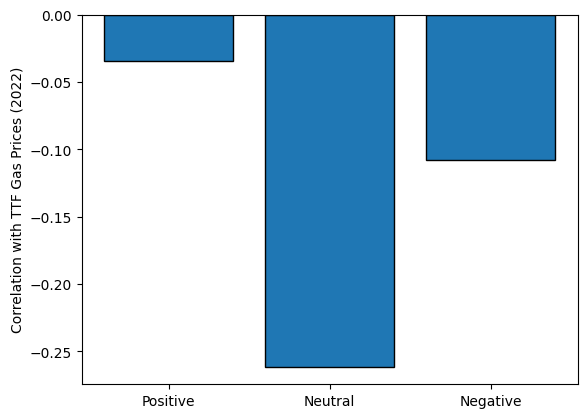

In [315]:
dict_price_sentiment_corr = {"Sentiment" : ["Positive", "Neutral", "Negative"], "Correlation" : []}

dict_price_sentiment_corr["Correlation"].append(df_2022_sentiments["Positive Sentiments"].corr(df_TTF22["Price"]))
dict_price_sentiment_corr["Correlation"].append(df_2022_sentiments["Neutral Sentiments"].corr(df_TTF22["Price"]))
dict_price_sentiment_corr["Correlation"].append(df_2022_sentiments["Negative Sentiments"].corr(df_TTF22["Price"]))

plt.bar(x = dict_price_sentiment_corr["Sentiment"], height = dict_price_sentiment_corr["Correlation"], edgecolor = "black")
plt.ylabel("Correlation with TTF Gas Prices (2022)")

In [457]:
df_2022_term_frequencies_totals["Mentions of Russian-related Terms"].corr(df_2022_sentiments["Negative Sentiments"])

0.9857163271239823

In [459]:
df_2022_term_frequencies_totals["Mentions of Ukraine-related Terms"].corr(df_2022_sentiments["Negative Sentiments"])

0.9922560007541028

In [461]:
df_2022_term_frequencies_totals["Mentions of Russian-related Terms"].corr(df_2022_sentiments["Positive Sentiments"])

0.9833840152706289

In [462]:
df_2022_term_frequencies_totals["Mentions of Ukraine-related Terms"].corr(df_2022_sentiments["Positive Sentiments"])

0.9895120250196919

In [456]:
df_2022_term_frequencies_totals["Mentions of Russian-related Terms"].corr(df_TTF22["Price"])

-0.1846134511425092

In [460]:
df_2022_term_frequencies_totals["Mentions of Ukraine-related Terms"].corr(df_TTF22["Price"])

-0.13084574090385556

<h2>Discussion 1</h2>
<p>All content produced by The Daily Mail in 2022 mentioning either Russia, Ukraine, or their leaders, was webscraped over the course of approximately 10 hours and 30 minutes, in which exactly 36,521 article URLs were retrieved, and subsequently scraped for their text content as per their HTML structure using BeautifulSoup. This text content was then preprocessed for sentiment analysis with VADER, part of the Natural Language Toolkit (NLTK).</p>

<p>The VADER sentiment analyzer is better suited to short, Tweet-size corpuses of around 10-100 words, as opposed to articles comprising of thousands of words. For this reason, VADER was inevitably a poor fit for the material analyzed in this research. An alternative approach would have involved partitioning each article into its constituent sentences (delimited by periods '.') prior to stemming, dropping the sentences which do not include the terms "Russia" or "Russian", conduct sentiment analysis on each sentence, then count the number of negative sentiments which are present. From this, a targeted analysis of anti-Russian sentiment could have been conducted.</p>

<p>However, interpretations of article sentiments were nevertheless produced and the resulting data was utilized for exploratory data analysis, in which it was found that the quantity of articles mentioning Russia and Ukraine possessing negative sentiment published by The Daily Mail in 2022 shared a weak negative correlation with the European gas prices reported by the Dutch TTF benchmark in the same year. From this weak correlation, a mandate for creating a predictive, regressional model was eliminated. Although the strong positive correlations exhbited between the quantity of mentions for Russian-related terms and this negative sentiment was evident, this was shared between positive sentiment as well, and was also exhbited by the Ukraine-related terms. This shared correlation between Russia and Ukraine terms arose from the aforementioned lack of targeted sentiment analysis conducted in the research. The correlations uncovered dissolved any mandate for regressional modelling (e.g., logistic regression for predicting discrete sentiment values).</p>

<p>Apart from the correlations, it was observed that the number of articles possessing negative sentiment outnumbered the ones exhibiting positive sentiment by an average factor of [...], and that the mentions for Russian-related terms consistently outnumbered those of Ukraine-related terms, insinuating that Russia was a primary target for journalism throughout 2022, even in articles which mentioned Ukraine. Additionally, it was observed that the Pearson correlation coefficient between publication date and overall positive sentiment increased over time, whereas that of overall negative and neutral sentiments decreased.</p>

<p>Targeted sentiment analysis for anti-Russian sentiment is conducted in the following remaining sections of this report.</p>

<h2>Preprocessing 3</h2>
<p>The following data preprocessing takes into consideration individual sentences mentioning terms containing "Russia" by extracting them from each article.</p>

<p>By extracting these sentences it will be possible for VADER to adequately assess each one for sentiment as per its design.</p>

<p>Once the sentences are extracted, indications for which articles they belong to will be dissolved, rendering the analysis to a sentence-by-sentence basis, rather than the previous article-by-article basis.</p>

In [1]:
def extract_sentences_from_articles(df):
    dict_extracted_sentences = {"Date" : [], "Text" : []}
    # Scan all rows in the Text column for the given dataframe.
    for i in range(0, len(df.iloc[:,0])):
        # Partition the text content on the 'ith' row by sentences (as much as the HTML fomatting allows for).
        split = df["Text"][i].split(". ")
        # Scan all sentences.
        for sentence in split:
            # If the sentence does not mention Russia, Russian, etc, then ignore it.
            if sentence.__contains__("Russia") is True:
                dict_extracted_sentences["Text"].append(sentence)
                dict_extracted_sentences["Date"].append(df.iloc[i]["Date"])
    
    df_extracted_sentences = pd.DataFrame.from_dict(dict_extracted_sentences)
    return df_extracted_sentences


<h3>January</h3>

In [7]:
with open(file = "datasets/_daily_mail_articles_contents_JAN.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JAN22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JAN22_extracted_sentences = extract_sentences_from_articles(df_JAN22)

In [ ]:
df_JAN22_extracted_sentences

In [47]:
df_JAN22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_JAN.csv")

<h3>February</h3>

In [8]:
with open(file = "datasets/_daily_mail_articles_contents_FEB.csv", mode = 'r', encoding = 'utf-8') as f:
    df_FEB22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_FEB22_extracted_sentences = extract_sentences_from_articles(df_FEB22)

In [ ]:
df_FEB22_extracted_sentences

In [48]:
df_FEB22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_FEB.csv")

<h3>March</h3>

In [24]:
with open(file = "datasets/_daily_mail_articles_contents_MAR.csv", mode = 'r', encoding = 'utf-8') as f:
    df_MAR22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_MAR22_extracted_sentences = extract_sentences_from_articles(df_MAR22)

In [ ]:
df_MAR22_extracted_sentences

In [49]:
df_MAR22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_MAR.csv")

<h3>April</h3>

In [26]:
with open(file = "datasets/_daily_mail_articles_contents_APR.csv", mode = 'r', encoding = 'utf-8') as f:
    df_APR22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_APR22_extracted_sentences = extract_sentences_from_articles(df_APR22)

In [ ]:
df_APR22_extracted_sentences

In [50]:
df_APR22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_APR.csv")

<h3>May</h3>

In [28]:
with open(file = "datasets/_daily_mail_articles_contents_MAY.csv", mode = 'r', encoding = 'utf-8') as f:
    df_MAY22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_MAY22_extracted_sentences = extract_sentences_from_articles(df_MAY22)

In [ ]:
df_MAY22_extracted_sentences

In [51]:
df_MAY22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_MAY.csv")

<h3>June</h3>

In [30]:
with open(file = "datasets/_daily_mail_articles_contents_JUN.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JUN22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JUN22_extracted_sentences = extract_sentences_from_articles(df_JUN22)

In [ ]:
df_JUN22_extracted_sentences

In [52]:
df_JUN22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_JUN.csv")

<h3>July</h3>

In [32]:
with open(file = "datasets/_daily_mail_articles_contents_JUL.csv", mode = 'r', encoding = 'utf-8') as f:
    df_JUL22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_JUL22_extracted_sentences = extract_sentences_from_articles(df_JUL22)

In [ ]:
df_JUL22_extracted_sentences

In [53]:
df_JUL22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_JUL.csv")

<h3>August</h3>

In [34]:
with open(file = "datasets/_daily_mail_articles_contents_AUG.csv", mode = 'r', encoding = 'utf-8') as f:
    df_AUG22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_AUG22_extracted_sentences = extract_sentences_from_articles(df_AUG22)

In [ ]:
df_AUG22_extracted_sentences

In [54]:
df_AUG22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_AUG.csv")

<h3>September</h3>

In [36]:
with open(file = "datasets/_daily_mail_articles_contents_SEP.csv", mode = 'r', encoding = 'utf-8') as f:
    df_SEP22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_SEP22_extracted_sentences = extract_sentences_from_articles(df_SEP22)

In [ ]:
df_SEP22_extracted_sentences

In [55]:
df_SEP22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_SEP.csv")

<h3>October</h3>

In [38]:
with open(file = "datasets/_daily_mail_articles_contents_OCT.csv", mode = 'r', encoding = 'utf-8') as f:
    df_OCT22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_OCT22_extracted_sentences = extract_sentences_from_articles(df_OCT22)

In [ ]:
df_OCT22_extracted_sentences

In [56]:
df_OCT22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_OCT.csv")

<h3>November</h3>

In [43]:
with open(file = "datasets/_daily_mail_articles_contents_NOV.csv", mode = 'r', encoding = 'utf-8') as f:
    df_NOV22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_NOV22_extracted_sentences = extract_sentences_from_articles(df_NOV22)

In [ ]:
df_NOV22_extracted_sentences

In [57]:
df_NOV22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_NOV.csv")

<h3>December</h3>

In [45]:
with open(file = "datasets/_daily_mail_articles_contents_DEC.csv", mode = 'r', encoding = 'utf-8') as f:
    df_DEC22 = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    df_DEC22_extracted_sentences = extract_sentences_from_articles(df_DEC22)

In [ ]:
df_DEC22_extracted_sentences

In [58]:
df_DEC22_extracted_sentences.to_csv("datasets/_daily_mail_article_sentences_DEC.csv")

<p>Create corpuses from sentences in dataframes.</p>

<h3>January</h3>

In [15]:
with open(file = "datasets/_daily_mail_article_sentences_JAN.csv", mode = "r", encoding = "utf-8") as f:
    df_JAN22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_JAN22_sentences_corpus = create_corpus(df_JAN22_extracted_sentences)

In [ ]:
df_JAN22_sentences_corpus

<h3>February</h3>

In [67]:
with open(file = "datasets/_daily_mail_article_sentences_FEB.csv", mode = "r", encoding = "utf-8") as f:
    df_FEB22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_FEB22_sentences_corpus = create_corpus(df_FEB22_extracted_sentences)

In [ ]:
df_FEB22_sentences_corpus

<h3>March</h3>

In [69]:
with open(file = "datasets/_daily_mail_article_sentences_MAR.csv", mode = "r", encoding = "utf-8") as f:
    df_MAR22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_MAR22_sentences_corpus = create_corpus(df_MAR22_extracted_sentences)

In [ ]:
df_MAR22_sentences_corpus

<h3>April</h3>

In [71]:
with open(file = "datasets/_daily_mail_article_sentences_APR.csv", mode = "r", encoding = "utf-8") as f:
    df_APR22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_APR22_sentences_corpus = create_corpus(df_APR22_extracted_sentences)

In [ ]:
df_APR22_sentences_corpus

<h3>May</h3>

In [73]:
with open(file = "datasets/_daily_mail_article_sentences_MAY.csv", mode = "r", encoding = "utf-8") as f:
    df_MAY22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_MAY22_sentences_corpus = create_corpus(df_MAY22_extracted_sentences)

In [ ]:
df_MAY22_sentences_corpus

<h3>June</h3>

In [75]:
with open(file = "datasets/_daily_mail_article_sentences_JUN.csv", mode = "r", encoding = "utf-8") as f:
    df_JUN22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_JUN22_sentences_corpus = create_corpus(df_JUN22_extracted_sentences)

In [ ]:
df_JUN22_sentences_corpus

<h3>July</h3>

In [77]:
with open(file = "datasets/_daily_mail_article_sentences_JUL.csv", mode = "r", encoding = "utf-8") as f:
    df_JUL22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_JUL22_sentences_corpus = create_corpus(df_JUL22_extracted_sentences)

In [ ]:
df_JUL22_sentences_corpus

<h3>August</h3>

In [79]:
with open(file = "datasets/_daily_mail_article_sentences_AUG.csv", mode = "r", encoding = "utf-8") as f:
    df_AUG22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_AUG22_sentences_corpus = create_corpus(df_AUG22_extracted_sentences)

In [ ]:
df_AUG22_sentences_corpus

<h3>September</h3>

In [81]:
with open(file = "datasets/_daily_mail_article_sentences_SEP.csv", mode = "r", encoding = "utf-8") as f:
    df_SEP22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_SEP22_sentences_corpus = create_corpus(df_SEP22_extracted_sentences)

In [ ]:
df_SEP22_sentences_corpus

<h3>October</h3>

In [83]:
with open(file = "datasets/_daily_mail_article_sentences_OCT.csv", mode = "r", encoding = "utf-8") as f:
    df_OCT22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_OCT22_sentences_corpus = create_corpus(df_OCT22_extracted_sentences)

In [ ]:
df_OCT22_sentences_corpus

<h3>November</h3>

In [85]:
with open(file = "datasets/_daily_mail_article_sentences_NOV.csv", mode = "r", encoding = "utf-8") as f:
    df_NOV22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_NOV22_sentences_corpus = create_corpus(df_NOV22_extracted_sentences)

In [ ]:
df_NOV22_sentences_corpus

<h3>December</h3>

In [87]:
with open(file = "datasets/_daily_mail_article_sentences_DEC.csv", mode = "r", encoding = "utf-8") as f:
    df_DEC22_extracted_sentences = pd.read_csv(f).drop(columns = "Unnamed: 0")
    df_DEC22_sentences_corpus = create_corpus(df_DEC22_extracted_sentences)

In [ ]:
df_DEC22_sentences_corpus

<h2>Sentiment Analysis 2</h2>

<h3>January</3>

In [ ]:
df_JAN22_sentences_sentiments = summarize_sentiment(df_JAN22_sentences_corpus)
df_JAN22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_JAN.csv")

<h3>February</h3>

In [ ]:
df_FEB22_sentences_sentiments = summarize_sentiment(df_FEB22_sentences_corpus)
df_FEB22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_FEB.csv")

<h3>March</h3>

In [ ]:
df_MAR22_sentences_sentiments = summarize_sentiment(df_MAR22_sentences_corpus)
df_MAR22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_MAR.csv")

<h3>April</h3>

In [ ]:
df_APR22_sentences_sentiments = summarize_sentiment(df_APR22_sentences_corpus)
df_APR22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_APR.csv")

<h3>May</h3>

In [ ]:
df_MAY22_sentences_sentiments = summarize_sentiment(df_MAY22_sentences_corpus)
df_MAY22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_MAY.csv")

<h3>June</h3>

In [ ]:
df_JUN22_sentences_sentiments = summarize_sentiment(df_JUN22_sentences_corpus)
df_JUN22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_JUN.csv")

<h3>July</h3>

In [ ]:
df_JUL22_sentences_sentiments = summarize_sentiment(df_JUL22_sentences_corpus)
df_JUL22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_JUL.csv")

<h3>August</h3>

In [ ]:
df_AUG22_sentences_sentiments = summarize_sentiment(df_AUG22_sentences_corpus)
df_AUG22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_AUG.csv")

<h3>September</h3>

In [ ]:
df_SEP22_sentences_sentiments = summarize_sentiment(df_SEP22_sentences_corpus)
df_SEP22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_SEP.csv")

<h3>October</h3>

In [ ]:
df_OCT22_sentences_sentiments = summarize_sentiment(df_OCT22_sentences_corpus)
df_OCT22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_OCT.csv")

<h3>November</h3>

In [ ]:
df_NOV22_sentences_sentiments = summarize_sentiment(df_NOV22_sentences_corpus)
df_NOV22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_NOV.csv")

<h3>December</h3>

In [ ]:
df_DEC22_sentences_sentiments = summarize_sentiment(df_DEC22_sentences_corpus)
df_DEC22_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_DEC.csv")

<p>Summarize sentiment distributions prior to visualization.</p>

<h3>January</h3>

In [16]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_JAN.csv", mode = "r", encoding = "utf-8") as f:
    df_JAN22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_JAN22 = assess_article_sentiment_distribution(df_JAN22_sentences_sentiments)

11117 instances assessed.
2553 positive instances found.
3070 neutral instances found.
5494 negative instances found.


<h3>February</h3>

In [18]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_FEB.csv", mode = "r", encoding = "utf-8") as f:
    df_FEB22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_FEB22 = assess_article_sentiment_distribution(df_FEB22_sentences_sentiments)

43172 instances assessed.
10544 positive instances found.
11159 neutral instances found.
21469 negative instances found.


<h3>March</h3>

In [19]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_MAR.csv", mode = "r", encoding = "utf-8") as f:
    df_MAR22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_MAR22 = assess_article_sentiment_distribution(df_MAR22_sentences_sentiments)

67960 instances assessed.
16436 positive instances found.
15790 neutral instances found.
35734 negative instances found.


<h3>April</h3>

In [20]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_APR.csv", mode = "r", encoding = "utf-8") as f:
    df_APR22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_APR22 = assess_article_sentiment_distribution(df_APR22_sentences_sentiments)

30872 instances assessed.
6472 positive instances found.
7450 neutral instances found.
16950 negative instances found.


<h3>May</h3>

In [21]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_MAY.csv", mode = "r", encoding = "utf-8") as f:
    df_MAY22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_MAY22 = assess_article_sentiment_distribution(df_MAY22_sentences_sentiments)

21366 instances assessed.
4899 positive instances found.
5513 neutral instances found.
10954 negative instances found.


<h3>June</h3>

In [22]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_JUN.csv", mode = "r", encoding = "utf-8") as f:
    df_JUN22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_JUN22 = assess_article_sentiment_distribution(df_JUN22_sentences_sentiments)

16400 instances assessed.
3909 positive instances found.
4326 neutral instances found.
8165 negative instances found.


<h3>July</h3>

In [23]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_JUL.csv", mode = "r", encoding = "utf-8") as f:
    df_JUL22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_JUL22 = assess_article_sentiment_distribution(df_JUL22_sentences_sentiments)

14173 instances assessed.
3279 positive instances found.
3990 neutral instances found.
6904 negative instances found.


<h3>August</h3>

In [24]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_AUG.csv", mode = "r", encoding = "utf-8") as f:
    df_AUG22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_AUG22 = assess_article_sentiment_distribution(df_AUG22_sentences_sentiments)

12312 instances assessed.
2637 positive instances found.
3394 neutral instances found.
6281 negative instances found.


<h3>September</h3>

In [25]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_SEP.csv", mode = "r", encoding = "utf-8") as f:
    df_SEP22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_SEP22 = assess_article_sentiment_distribution(df_SEP22_sentences_sentiments)

18109 instances assessed.
3985 positive instances found.
5140 neutral instances found.
8984 negative instances found.


<h3>October</h3>

In [26]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_OCT.csv", mode = "r", encoding = "utf-8") as f:
    df_OCT22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_OCT22 = assess_article_sentiment_distribution(df_OCT22_sentences_sentiments)

16563 instances assessed.
3093 positive instances found.
4570 neutral instances found.
8900 negative instances found.


<h3>November</h3>

In [27]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_NOV.csv", mode = "r", encoding = "utf-8") as f:
    df_NOV22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_NOV22 = assess_article_sentiment_distribution(df_NOV22_sentences_sentiments)

12983 instances assessed.
2600 positive instances found.
3374 neutral instances found.
7009 negative instances found.


<h3>December</h3>

In [29]:
with open(file = "datasets/_daily_mail_article_sentences_sentiments_DEC.csv", mode = "r", encoding = "utf-8") as f:
    df_DEC22_sentences_sentiments = pd.read_csv(f).drop("Unnamed: 0", axis = "columns")
    sentences_sentiment_dist_DEC22 = assess_article_sentiment_distribution(df_DEC22_sentences_sentiments)

10768 instances assessed.
2213 positive instances found.
2820 neutral instances found.
5735 negative instances found.


<p>Cache sentiments of each month into a list.</p>

In [30]:
list_2022_sentences_sentiment_dists = [
    sentences_sentiment_dist_JAN22,
    sentences_sentiment_dist_FEB22,
    sentences_sentiment_dist_MAR22,
    sentences_sentiment_dist_APR22,
    sentences_sentiment_dist_MAY22,
    sentences_sentiment_dist_JUN22,
    sentences_sentiment_dist_JUL22,
    sentences_sentiment_dist_AUG22,
    sentences_sentiment_dist_SEP22,
    sentences_sentiment_dist_OCT22,
    sentences_sentiment_dist_NOV22,
    sentences_sentiment_dist_DEC22
]

<p>Save sentence sentiment distribution to local CSV file for later usage.</p>

In [33]:
dict_2022_sentences_sentiments = assess_sentiments_for_2022(list_2022_sentences_sentiment_dists)
df_2022_sentences_sentiments = pd.DataFrame.from_dict(dict_2022_sentences_sentiments)

In [238]:
df_2022_sentences_sentiments.to_csv("datasets/_daily_mail_article_sentences_sentiments_distributions_2022.csv")

<h2>Visualization 3</h2>

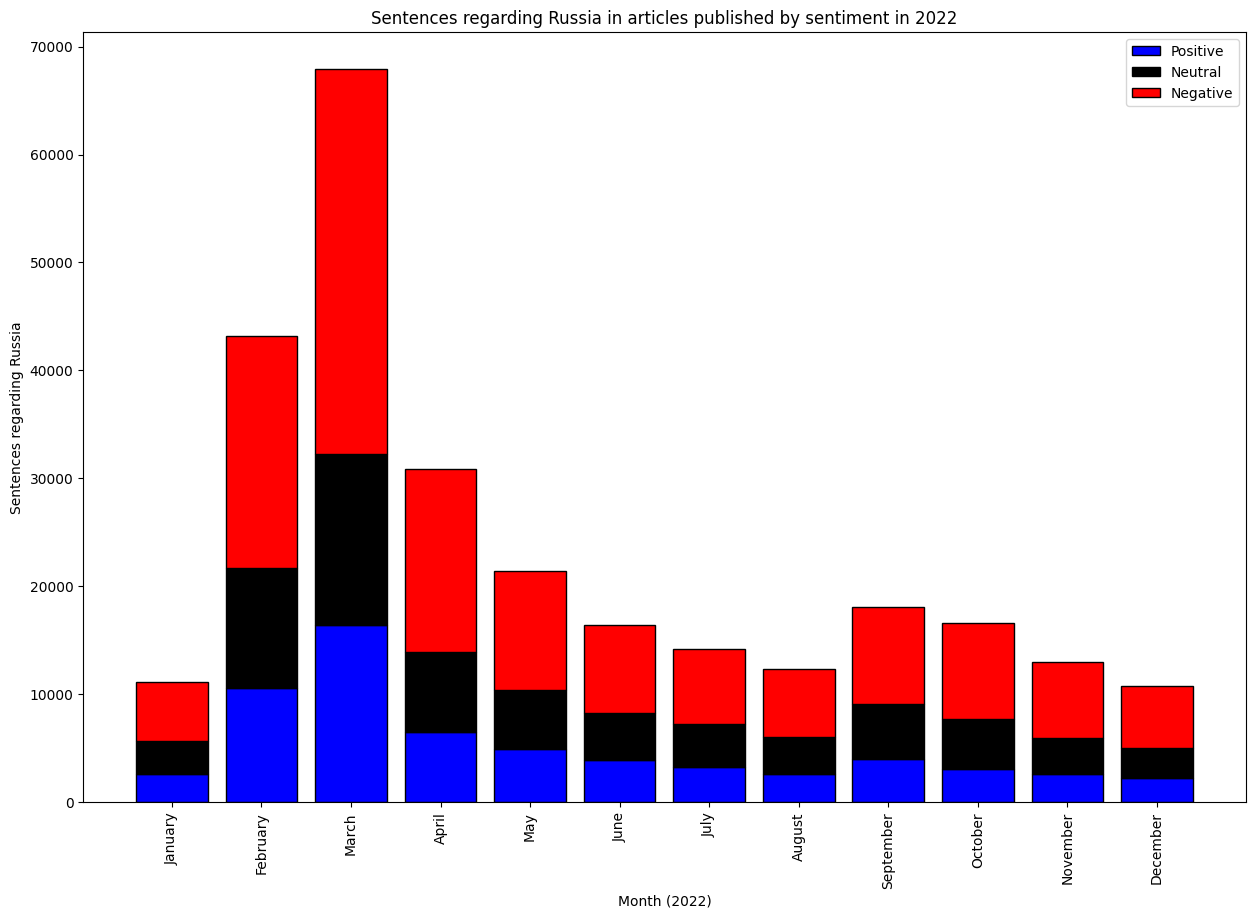

In [239]:
plt.figure(figsize = (15,10))
plt.bar(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Positive Sentiments"], color = "blue", edgecolor = "black")
plt.bar(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Neutral Sentiments"], bottom = df_2022_sentences_sentiments["Positive Sentiments"], color = "black", edgecolor = "black")
plt.bar(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Negative Sentiments"], bottom = df_2022_sentences_sentiments["Positive Sentiments"] + df_2022_sentences_sentiments["Neutral Sentiments"], color = "red", edgecolor = "black")
plt.legend(["Positive", "Neutral", "Negative"])
plt.title("Sentences regarding Russia in articles published by sentiment in 2022")
plt.xlabel("Month (2022)")
plt.ylabel("Sentences regarding Russia")
plt.xticks(rotation = 90)
plt.show()

Positive sentiments in 2022: 62620
Neutral sentiments in 2022: 70596
Negative sentiments in 2022: 142579


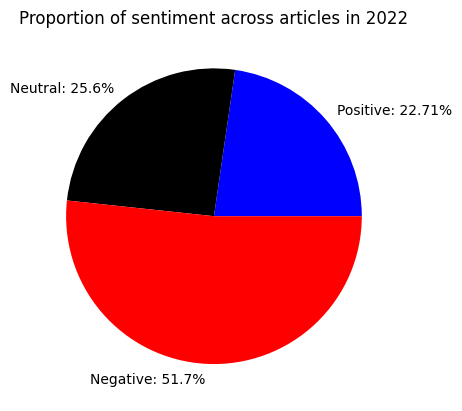

In [240]:
generate_pie_chart(df_2022_sentences_sentiments)

In [34]:
df_2022_sentences_sentiments

,Month,Positive Sentiments,Neutral Sentiments,Negative Sentiments
0,January,2553,3070,5494
1,February,10544,11159,21469
2,March,16436,15790,35734
3,April,6472,7450,16950
4,May,4899,5513,10954
5,June,3909,4326,8165
6,July,3279,3990,6904
7,August,2637,3394,6281
8,September,3985,5140,8984
9,October,3093,4570,8900


<p>Plotting the monthly sentiments for 2022 with TTF Gas Benchmark gives the following...</p>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

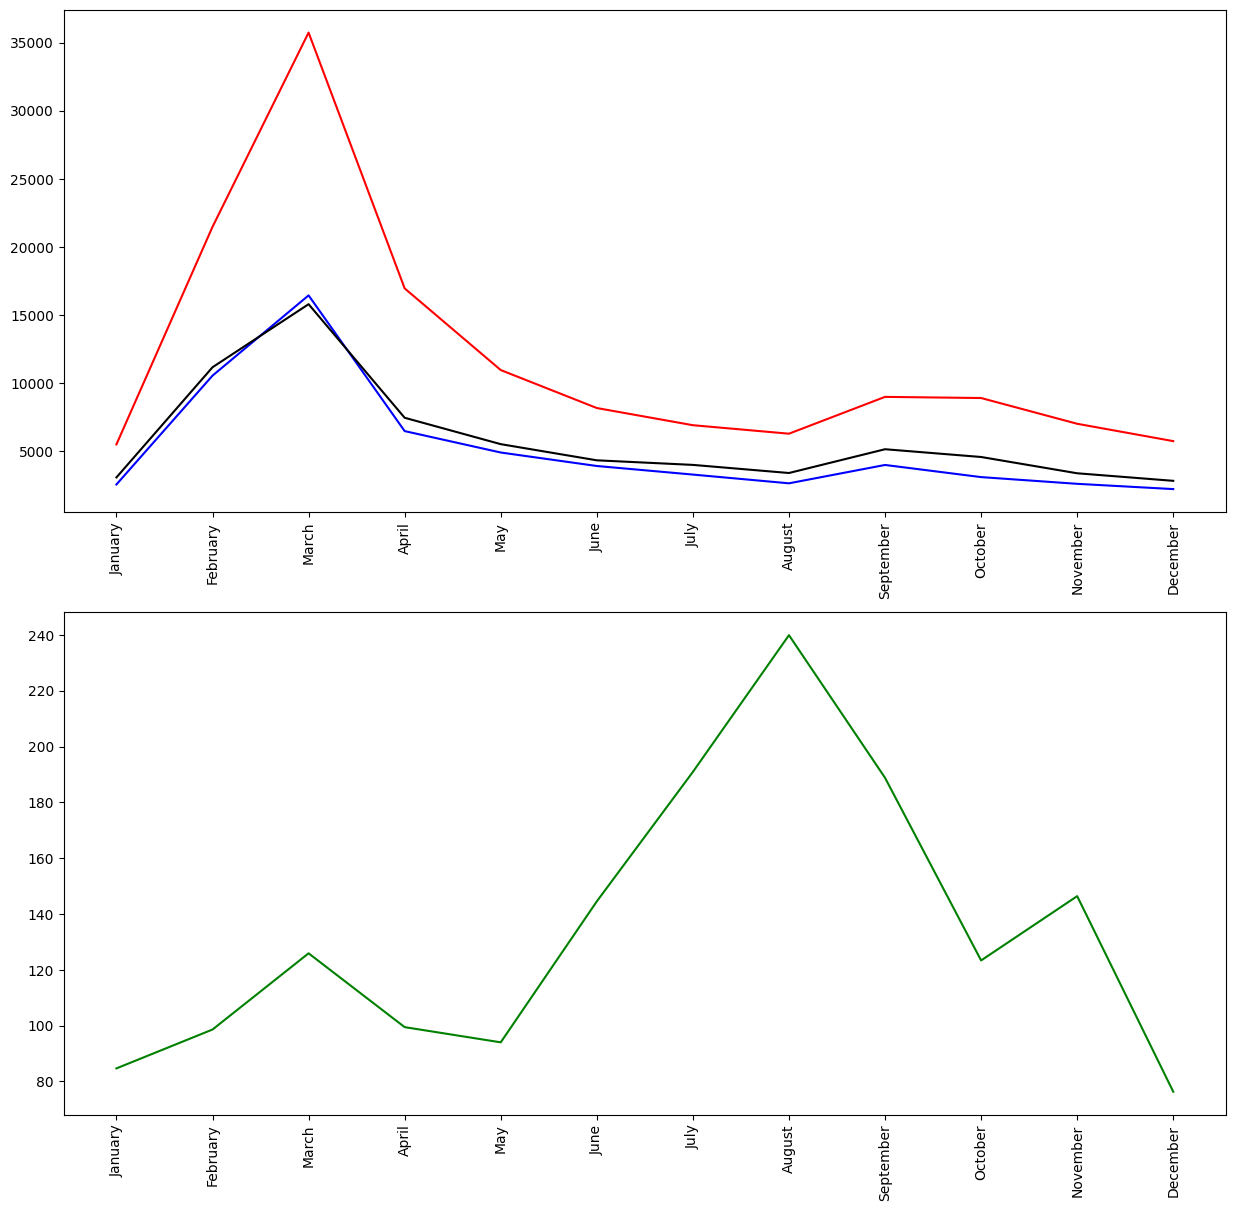

In [35]:
plt.figure(figsize=[15,30])
plt.subplot(4, 1, 1)
plt.plot(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Positive Sentiments"], color = "blue")
plt.plot(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Neutral Sentiments"], color = "black")
plt.plot(df_2022_sentences_sentiments["Month"], df_2022_sentences_sentiments["Negative Sentiments"], color = "red")
plt.xticks(rotation = 90)
plt.subplot(4, 1, 2)
plt.plot(df_TTF22["Month"], df_TTF22["Price"], color = "green")
plt.xticks(rotation = 90)

<h2>Data Analysis 2</h2>
<p>With the sentiments of the articles published in 2022 by The Daily Mail now partitioned into their constituent sentences, a more representative analysis of their relationship to TTF European Gas Prices can be conducted. From the graph produced above it is clear that all monthly sentiments share a strong positive correlation.</p>

In [40]:
df_2022_sentences_sentiments.corr(numeric_only = True)

,Positive Sentiments,Neutral Sentiments,Negative Sentiments
Positive Sentiments,1.000000,0.995701,0.992132
Neutral Sentiments,0.995701,1.000000,0.992478
Negative Sentiments,0.992132,0.992478,1.000000


In [42]:
df_2022_sentences_sentiments["Negative Sentiments"].corr(df_TTF22["Price"])

-0.14321946434865043

<h2>Discussion 2</h2>

<p>It was shown in the previous sections that approximately half of the content, sentence by sentence, comprised of negative sentiment when discussing Russia or Russians as a topic. Although, this is not explicit proof of "anti-Russian" sentiment. For example, whilst a sentence may exhibit negative sentiment, it may do so in an agnostic nature for the sake of reporting on an event...</p>

In [244]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [250]:
sia.polarity_scores("Many Russians wounded, 16 dead.")

{'neg': 0.518, 'neu': 0.482, 'pos': 0.0, 'compound': -0.6486}

In [261]:
sia.polarity_scores("Russian citizens are in need of humanitarian support.")

{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}

In [260]:
sia.polarity_scores("RUSSIA WITHDRAWS: War in Ukraine comes to an end.")

{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}

<p>These statements are what one may read in a generic tabloid: they report on (here hypothetical) events which have occured. All three of these statements exhibit either mainly negative or neutral sentiment. The VADER lexicon details whether the statement reports on something which can be considered positive, neutral, or negative, but it does not take into consideration the audience who would consider it so.</p>

<p>To group A, the statement "RUSSIA WITHDRAWS: War in Ukraine comes to an end." may be something to celebrate - a highly positive sentiment -, but to group B it may fall under the epitome of bad news - a highly negative sentiment. This particular statement does not exhibit anything anti-Russian - it merely states an event, appropriately neutral. VADER interpreted this as a neutral to negative statement, negating what others may consider as "good" or "bad" news and conforming to agnostic reporting.</p>

<p>With the definitions of anti-Russian sentiment outlined at the beginning of this report...</p>

In [264]:
sia.polarity_scores("I hate Russians!")

{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}

In [263]:
sia.polarity_scores("I hope all Russians suffer!")

{'neg': 0.436, 'neu': 0.23, 'pos': 0.334, 'compound': -0.2244}

In [266]:
sia.polarity_scores("Russians are all evil!")

{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.69}

<p>All three of these statements are blatantly anti-Russian. They each express a negative sentiment targeted at Russian peoples, which is indicative that such corpuses can possess basic discrete values of positive, neutral and negative. Anti-Russian sentiment is inherently negative in sentiment according to VADER, although other analyzers, or individuals may interpret it as positive.</p>

<p>While The Daily Mail is a source of news, this news is compiled by authors - human beings with preferences and biases, regardless of the profession they have been employed for. While the contents of the news they propagate may not be explicitly anti-Russian, it does exhibit a large proportion of negative sentiment in the context of Russia or Russians according to VADER. This insinuates that The Daily Mail prefered to report on the bad news about Russia throughout 2022, as opposed to good news. The motives behind this are unclear, although it may have been associated with the number of readers they attracted to their website. Analysts working for The Daily Mail may have recognized that bad news attracts more traffic, and thus more revenue for the tabloid.</p>

<p>In order to uncover how much anti-Russian sentiment is present in The Daily Mail (and indeed any other tabloid) it was necessary to first define the perspective of the analyzer: e.g., should anti-Russian sentiment be considered negative or positive? The researcher, and the VADER sentiment analyzer considers it negative. The secondary component for this analysis, which is best left here for further research, is to cross reference this perspective of sentiment with the terms contained in the text content which are indicative of this anti-Russian sentiment: the challenge here being to separate reporting from explicit statements. Certain terms associated with anti-Russian sentiment and other hateful/offensive communication may be compared to this content to assist in the identification of the former.</p>

<h2>References</h2>
<p align = "justify">[1] UK Investing.com, "Dutch TTF Natural Gas Futures - Jan 23 (TFAc1)", 2023. [Online]. Available: <a href = "https://uk.investing.com/commodities/dutch-ttf-gas-c1-futures-historical-data">https://uk.investing.com/commodities/dutch-ttf-gas-c1-futures-historical-data</a> [Accessed: 25-Jan-2023]</p>

<p align = "justify">[2] Daily Mail Online, "2022 News Archive", 2022 [Online]. Available: <a href = "https://www.dailymail.co.uk/home/sitemaparchive/year_2022.html">https://www.dailymail.co.uk/home/sitemaparchive/year_2022.html</a> [Accessed: 03-Jan-2023]</p>

<p align = "justify">[3] Daily Mail Online, "Terms", 2023 [Online]. Available: <a href = "https://www.dailymail.co.uk/home/article-1388146/Terms.html">https://www.dailymail.co.uk/home/article-1388146/Terms.html</a> [Accessed: 03-Jan-2023]</p>

<p align = "justify">[4] Real Python, M. Mogyorosi, "Sentiment Analysis: First Steps With Python's NLTK Library", 2021. [Online]. Available: <a href = "https://realpython.com/python-nltk-sentiment-analysis/">https://realpython.com/python-nltk-sentiment-analysis/</a> [Accessed: 20-Jan-2023]</p>

<p align = "justify">[5] E. Walker, "European gas prices and NATO military budget", EDA investigative report, 2022.</p>